In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ast
import statistics
import collections
from collections import defaultdict

# Use LaTeX for text rendering, requires installation of LaTeX
# Comment these lines if LaTeX is not installed or you don't want to use it
plt.rcParams['text.usetex'] = True

# High resolution display
plt.rcParams["figure.dpi"] = 300

# Large figures
plt.rcParams["figure.figsize"] = [10, 6]

# Improve readability
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = False
# Choose a nice color palette
sns.set_palette('muted')

# Grid style
sns.set_style("whitegrid")


### Import Data

In [3]:
df = pd.read_excel("Dataset.xlsx")


In [36]:
df[df["Entry"] == "P06213"]

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,PDB_Files_Ordered,BestRanked,Chain,Chain_id,Missing,Score_missing_res,AvgScore_missing,Score_Present_res,AvgScore_Present,Coverage,Percent Covered,PDB Length
7143,P06213,reviewed,INSR_HUMAN,Insulin receptor (IR) (EC 2.7.10.1) (CD antige...,INSR,Homo sapiens (Human),1382,"['6PXV', '7YQ3', '4ZXB', '7QID', '6SOF', '7MQR...",6PXV,A/C=28-1382,['A'],"[[163, 164, 165, 166, 167, 271, 272, 273, 519,...","{163: 94.71, 164: 89.8, 165: 81.16, 166: 73.65...",70.335929,"{1: 36.28, 2: 37.43, 3: 41.14, 4: 39.3, 5: 37....",79.073912,823,59.551375,1355.0


### Compare avg scores per missing vs present (Total)

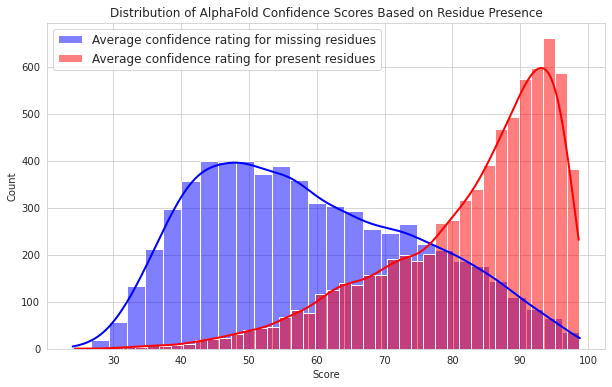

In [3]:


# Assuming that 'df_full' is your DataFrame 
# and 'AvgScore_missing' and 'AvgScore_Present' are columns in 'df_full'

plt.figure(figsize=(10,6))
sns.histplot(df['AvgScore_missing'], color='blue', kde=True, label='Average confidence rating for missing residues')
sns.histplot(df['AvgScore_Present'], color='red', kde=True, label='Average confidence rating for present residues')
plt.legend()
plt.xlabel('Score')
plt.title("Distribution of AlphaFold Confidence Scores Based on Residue Presence")
plt.savefig("Figures/Distribution_ConfidenceScores_Residue_Presence.svg", format = "svg")
plt.show()


### Graph showing the relationship of residue location and confidence prediction score
- in missing residues of the top pdb structure

# Compare Missing proteins with 

In [28]:
score_missing_res = df["Score_missing_res"]
total_conf_missing_score = {}  # Initialize total_conf_missing_score as an empty dictionary
# for sd
dict_of_scores = defaultdict(list)

for scores in score_missing_res:
    try:
        scores_dict = ast.literal_eval(scores)
    except:
        continue
    #print(type(scores_dict))
    for key, value in scores_dict.items():
        total_conf_missing_score.setdefault(key, 0)
        total_conf_missing_score[key] += value
        dict_of_scores[key].append(value)


In [29]:
standard_deviations = {}
for key, scores_list in dict_of_scores.items():
    # Check if there are at least two data points
    if len(scores_list) >= 2:
        standard_deviation = statistics.stdev(scores_list)
    else:
        standard_deviation = float('nan')  # Set to NaN for cases with less than two data points
    standard_deviations[key] = standard_deviation

#print(standard_deviations)

In [30]:
data_dict_score = {
    "Missing Residue": total_conf_missing_score.keys(),
    "Score" : total_conf_missing_score.values(),
    "Std" : standard_deviations.values()
}
df_scores = pd.DataFrame(data_dict_score)
df_scores
df_scores[df_scores["Missing Residue"] == 1000]

,Missing Residue,Score,Std
545,1000,10398.99,25.71404


In [31]:
missing_residues = df["Missing"]
residue_missing_count = {}
for residues in missing_residues:
    try:
        residues = eval(residues)
    except:
        continue
    # in the case where there are multiple chain in a pdb file that are coressponding to a specifc uniprot ID length of residues > 1 
    # in most cases, however, there will only be one chain
    flattened_residues = [res for sublist in residues for res in sublist]
    
    for missing_res in flattened_residues:
        # update the count in the dictionary
        residue_missing_count[missing_res] = residue_missing_count.get(missing_res, 0) + 1
        
for missing_residue, count in residue_missing_count.items():
    print(f"Missing Residue: {missing_residue}, Count: {count}")        

Missing Residue: 1, Count: 6246
Missing Residue: 2, Count: 5811
Missing Residue: 3, Count: 5567
Missing Residue: 4, Count: 5369
Missing Residue: 5, Count: 5189
Missing Residue: 6, Count: 5047
Missing Residue: 7, Count: 4924
Missing Residue: 8, Count: 4818
Missing Residue: 9, Count: 4735
Missing Residue: 10, Count: 4637
Missing Residue: 11, Count: 4561
Missing Residue: 12, Count: 4489
Missing Residue: 13, Count: 4427
Missing Residue: 14, Count: 4380
Missing Residue: 15, Count: 4324
Missing Residue: 16, Count: 4252
Missing Residue: 17, Count: 4194
Missing Residue: 18, Count: 4133
Missing Residue: 19, Count: 4089
Missing Residue: 20, Count: 4030
Missing Residue: 21, Count: 3974
Missing Residue: 22, Count: 3927
Missing Residue: 23, Count: 3887
Missing Residue: 24, Count: 3828
Missing Residue: 25, Count: 3772
Missing Residue: 26, Count: 3708
Missing Residue: 27, Count: 3647
Missing Residue: 28, Count: 3605
Missing Residue: 29, Count: 3561
Missing Residue: 30, Count: 3517
Missing Residue: 31

In [32]:
data_dict = {
    "Missing Residue": residue_missing_count.keys(),
    "Count": residue_missing_count.values()
}
df_counts = pd.DataFrame(data_dict)

In [33]:
#plt.plot(df_counts["Missing Residue"], df_counts["Count"])
df_scores_count_res = pd.merge(df_scores, df_counts)
df_scores_count_res["Average Alpha Fold Confidence of Residue"] = df_scores_count_res["Score"] / df_scores_count_res["Count"]
df_scores_count_res = df_scores_count_res[pd.notna(df_scores_count_res["Std"])]

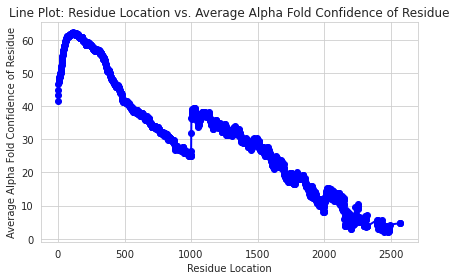

In [34]:

# Sort the DataFrame by "Residue Location" for a line plot
df_scores_count_res_sorted = df_scores_count_res.sort_values(by="Missing Residue")
df_scores_count_res_sorted.to_excel("ConfidencebyResidue.xlsx", index=False)
# Create a line plot
plt.plot(df_scores_count_res_sorted["Missing Residue"], df_scores_count_res_sorted["Average Alpha Fold Confidence of Residue"], color='blue', marker='o', linestyle='-')

# Set axis labels and title
plt.xlabel("Residue Location")
plt.ylabel("Average Alpha Fold Confidence of Residue")
plt.title("Line Plot: Residue Location vs. Average Alpha Fold Confidence of Residue")

# Add grid lines
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_3482813/4033121956.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(df_scores_count_res_sorted["Missing Residue"],


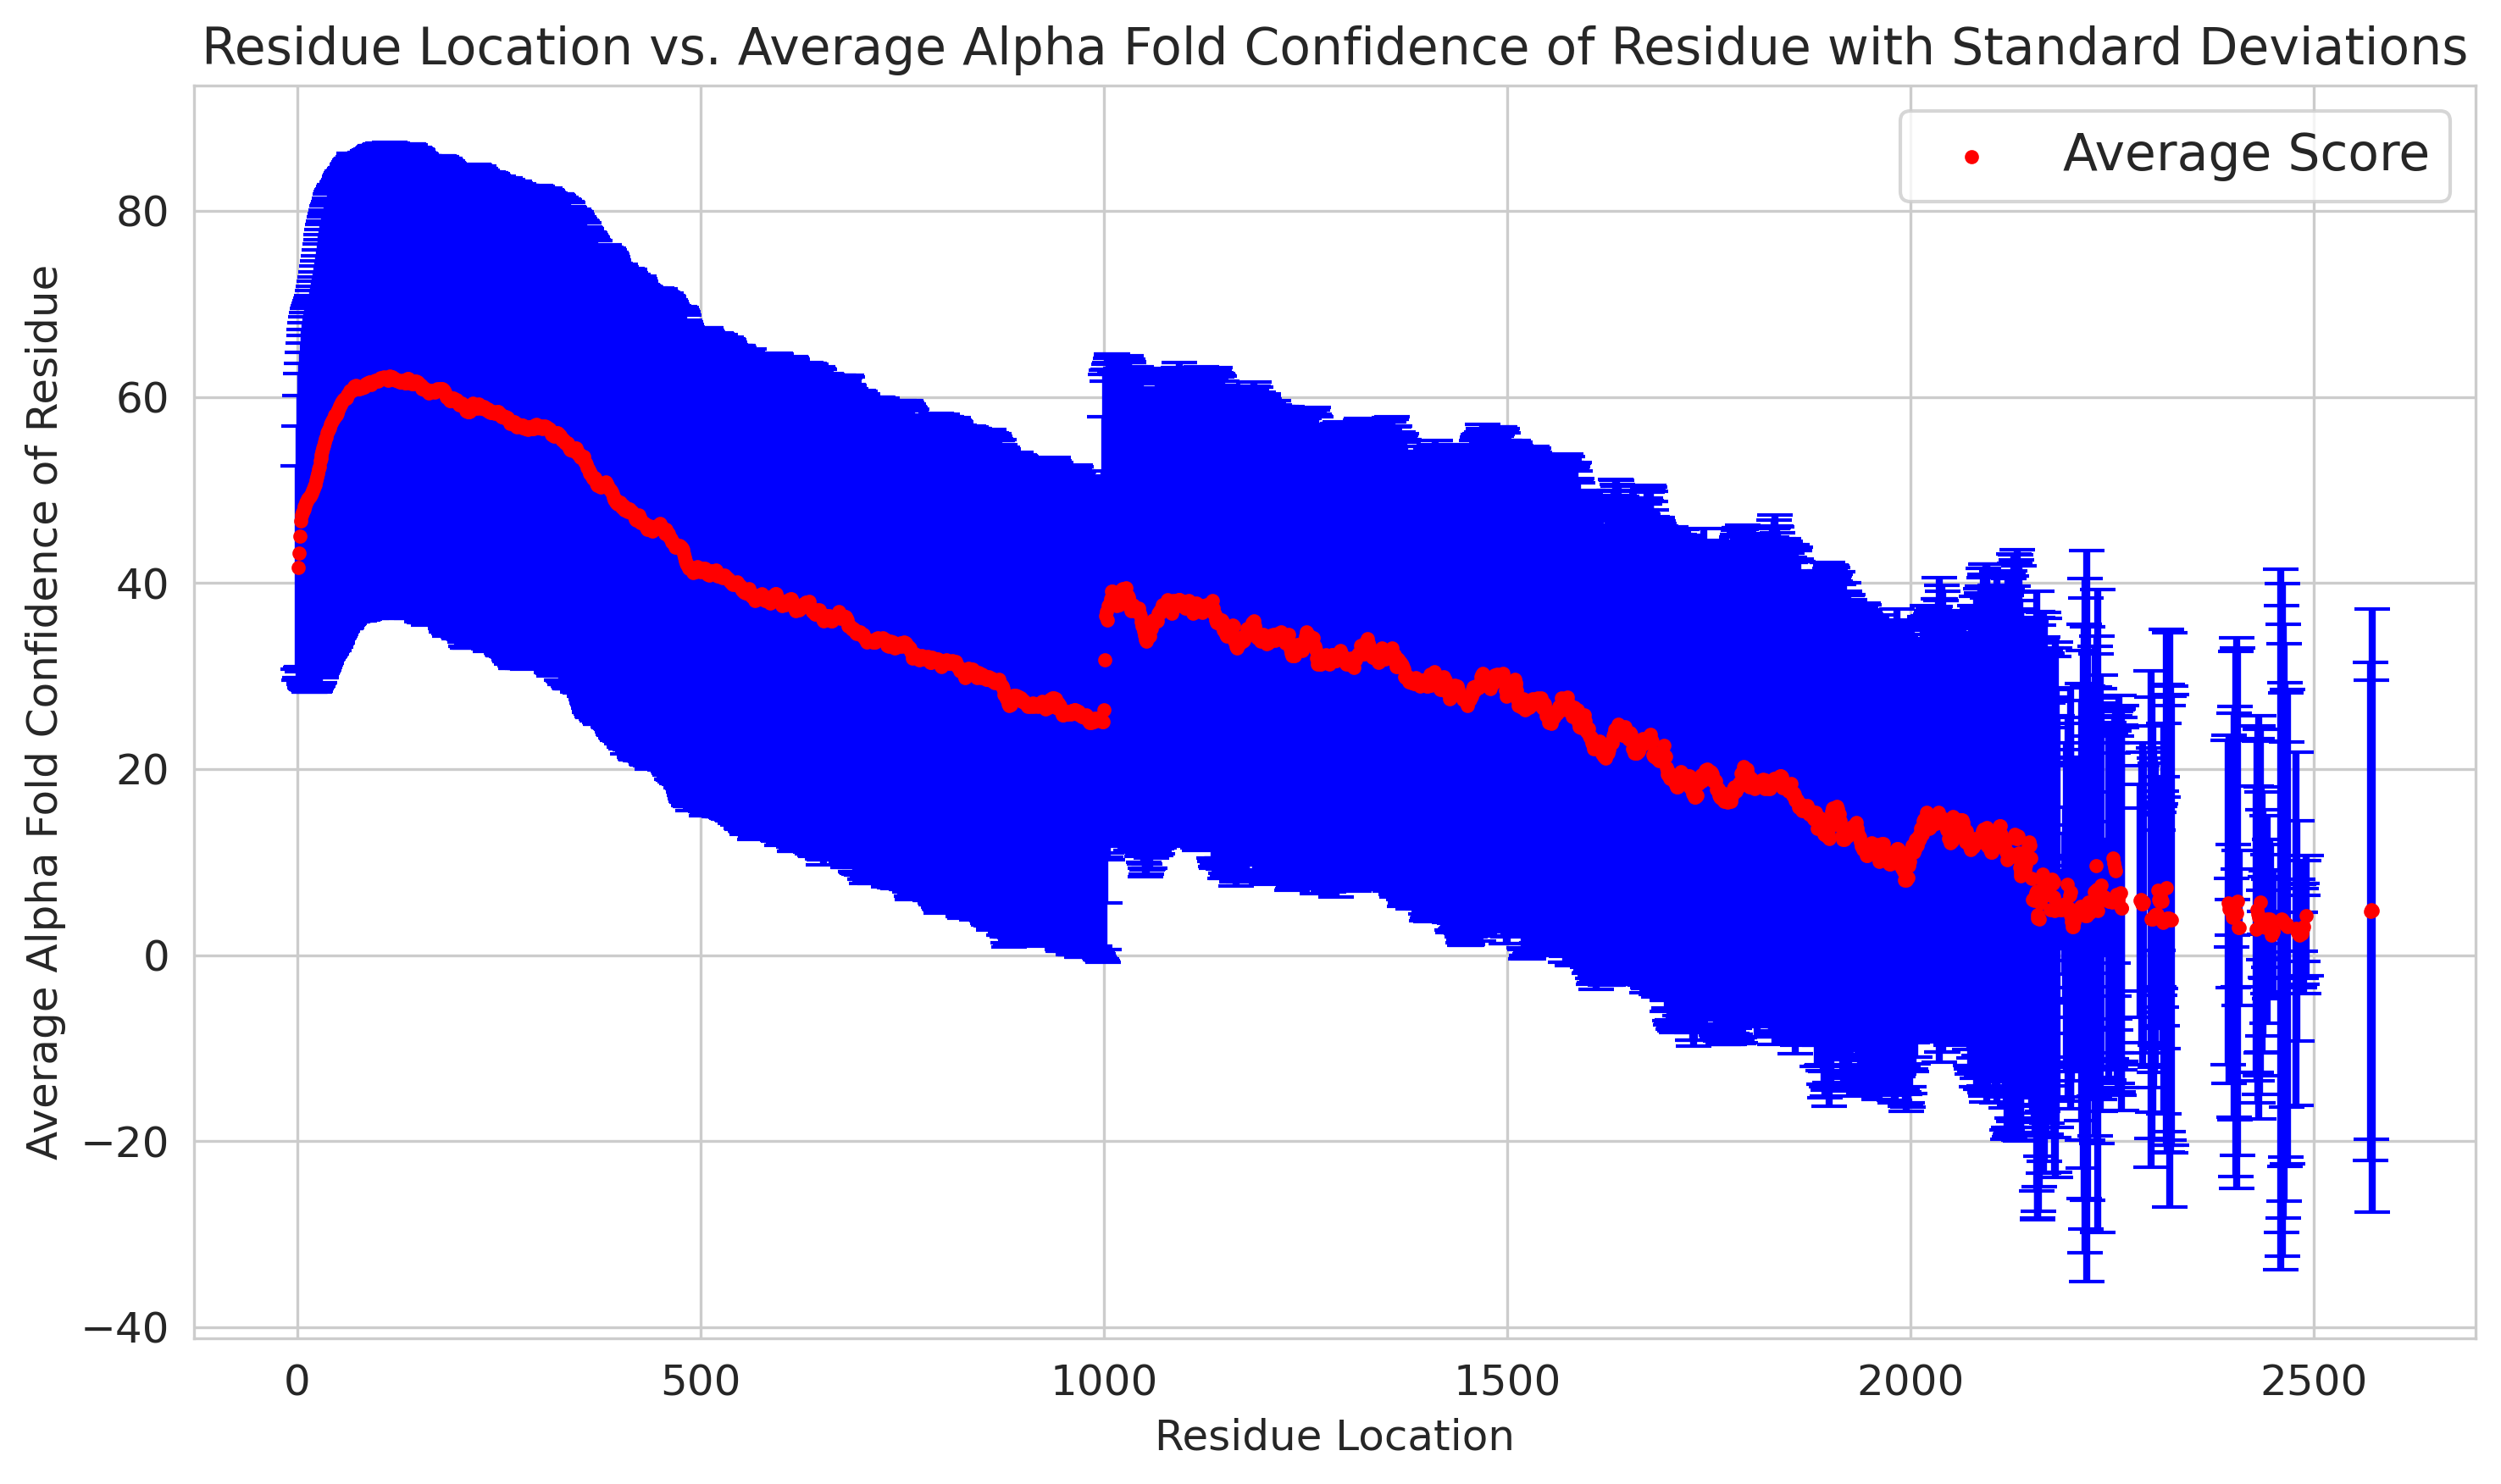

In [206]:
# Create a line plot with error bars for standard deviations (no markers here)
plt.errorbar(df_scores_count_res_sorted["Missing Residue"], 
             df_scores_count_res_sorted["Average Alpha Fold Confidence of Residue"], 
             yerr=df_scores_count_res_sorted["Std"],
             color='blue', linestyle= 'none', capsize=5, fmt='-', ecolor='blue')

# Add the markers separately (no error bars)
plt.scatter(df_scores_count_res_sorted["Missing Residue"], 
            df_scores_count_res_sorted["Average Alpha Fold Confidence of Residue"], 
            marker='.', color='red', zorder=2, label='Average Score')

# Set axis labels and title
plt.xlabel("Residue Location")
plt.ylabel("Average Alpha Fold Confidence of Residue")
plt.title("Residue Location vs. Average Alpha Fold Confidence of Residue with Standard Deviations")

# Add grid lines
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("Figures/ResidueLocationvsConfidence.svg", format = "svg")
plt.show()

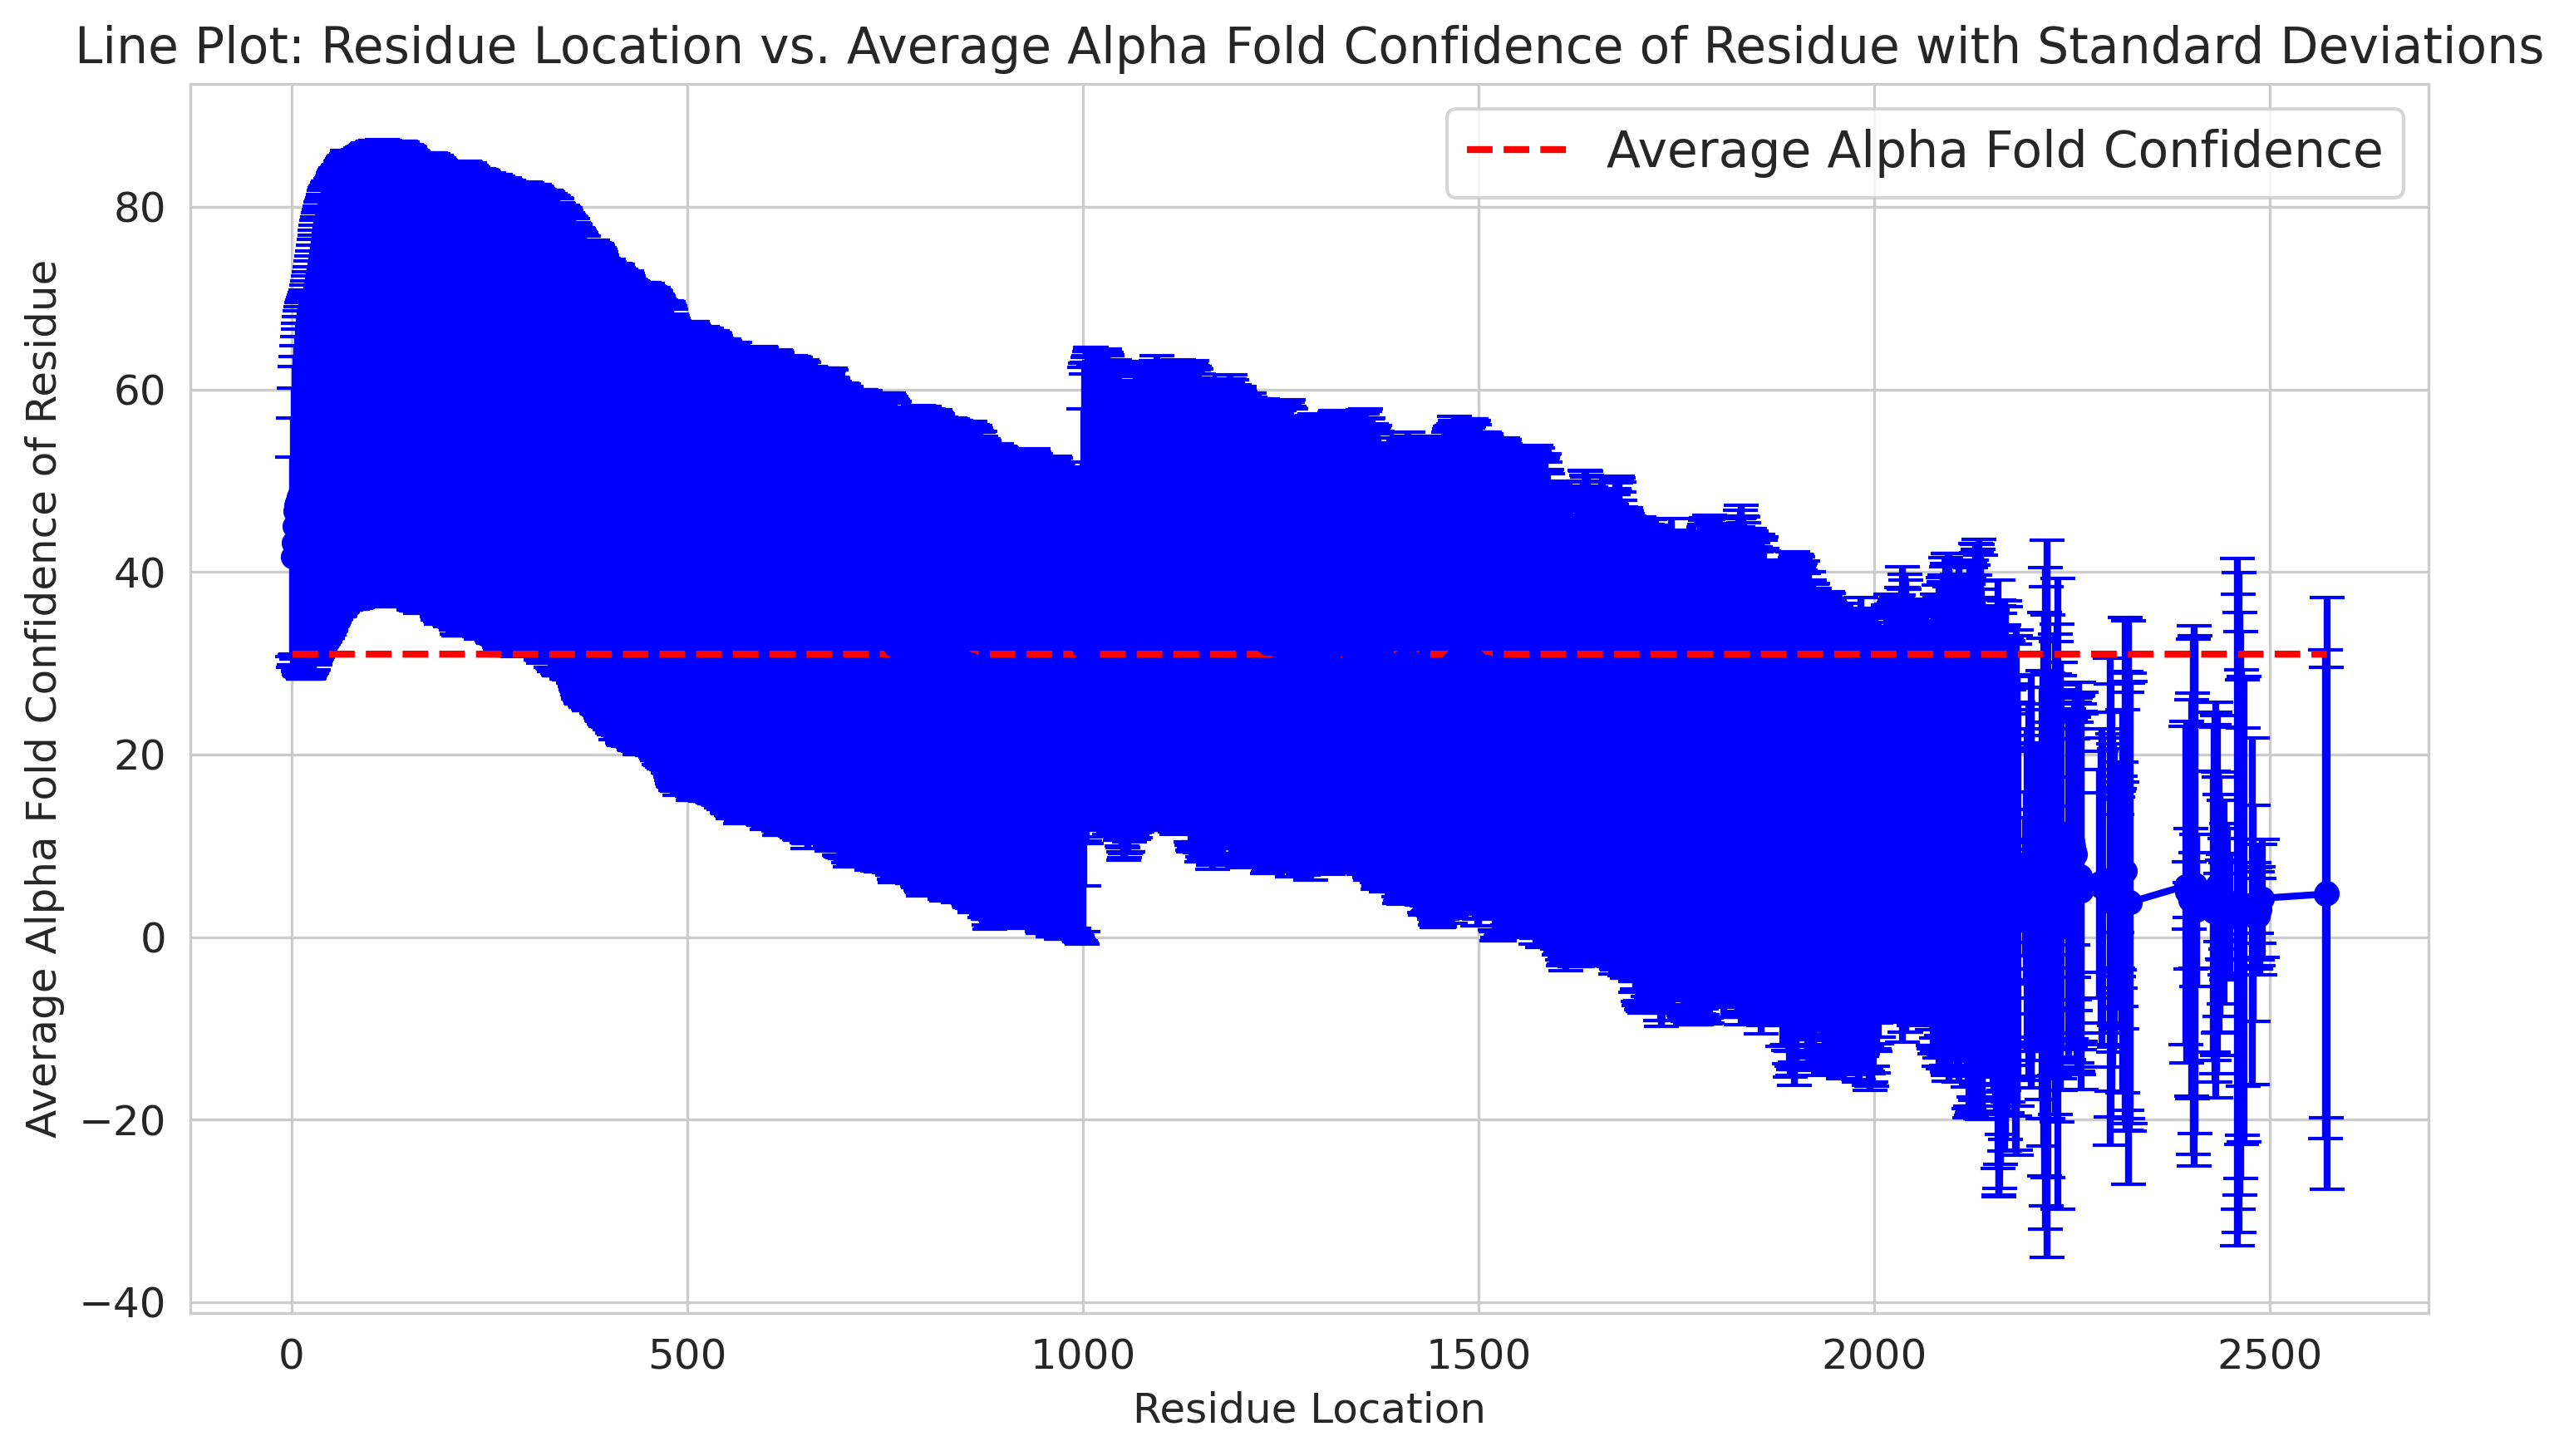

In [186]:
plt.errorbar(df_scores_count_res_sorted["Missing Residue"], 
             df_scores_count_res_sorted["Average Alpha Fold Confidence of Residue"], 
             yerr=df_scores_count_res_sorted["Std"],
             color='blue', marker='o', linestyle='-', capsize=5)

# Plot the average line
plt.plot(df_scores_count_res_sorted["Missing Residue"],
         np.full_like(df_scores_count_res_sorted["Missing Residue"], df_scores_count_res_sorted["Average Alpha Fold Confidence of Residue"].mean()),
         color='red', linestyle='--', label="Average Alpha Fold Confidence")

# Set axis labels and title
plt.xlabel("Residue Location")
plt.ylabel("Average Alpha Fold Confidence of Residue")
plt.title("Line Plot: Residue Location vs. Average Alpha Fold Confidence of Residue with Standard Deviations")

# Add grid lines
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Get the index values of rows in 'rows_with_count_one'
rows_to_remove = rows_with_count_one.index

# Remove rows from 'df' that are present in 'rows_to_remove'
df_filtered = df_counts.drop(rows_to_remove)

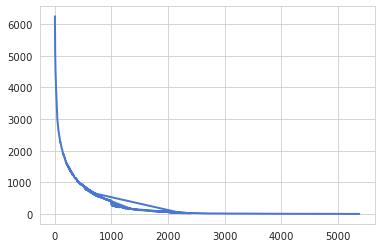

In [ ]:
plt.plot(df_filtered["Missing Residue"], df_filtered["Count"])

<BarContainer object of 5379 artists>

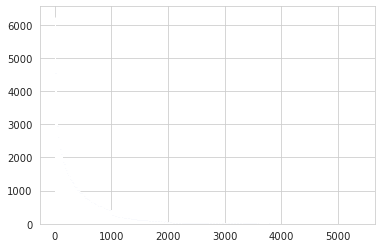

In [ ]:
plt.bar(df_filtered["Missing Residue"], df_filtered["Count"], color = )

# How many times are you missing 1 residue, how many time are you missing 3 residues....

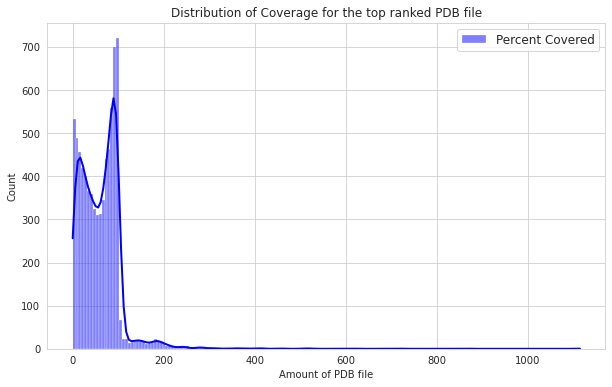

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(df['Percent Covered'], color='blue', kde=True, label='Percent Covered')
plt.legend()
plt.xlabel('Amount of PDB file')
plt.title("Distribution of Coverage for the top ranked PDB file")
plt.show()


In [60]:
# Remove all pdb files that have a coverage of PDB 
df_over_100 = df[df["Percent Covered"] > 100]
df_under_100 = df[df["Percent Covered"] <= 100] 
size_over = len(df_over_100)
size_under = len(df_under_100) 

if size_over + size_under == len(df):
    print("TRUE")

TRUE


### There are 472 out of 7603 PDB files where coverage is > 100 % this could be due to 
 - negative residues present in the pdb file
 - discreptencies in PDB file chain naming (authors vs uniprot) 
 - Post-translational modifcation can introduce additional atoms or residues in the protein structure 
 - different isoforms with varying lenghts may exist

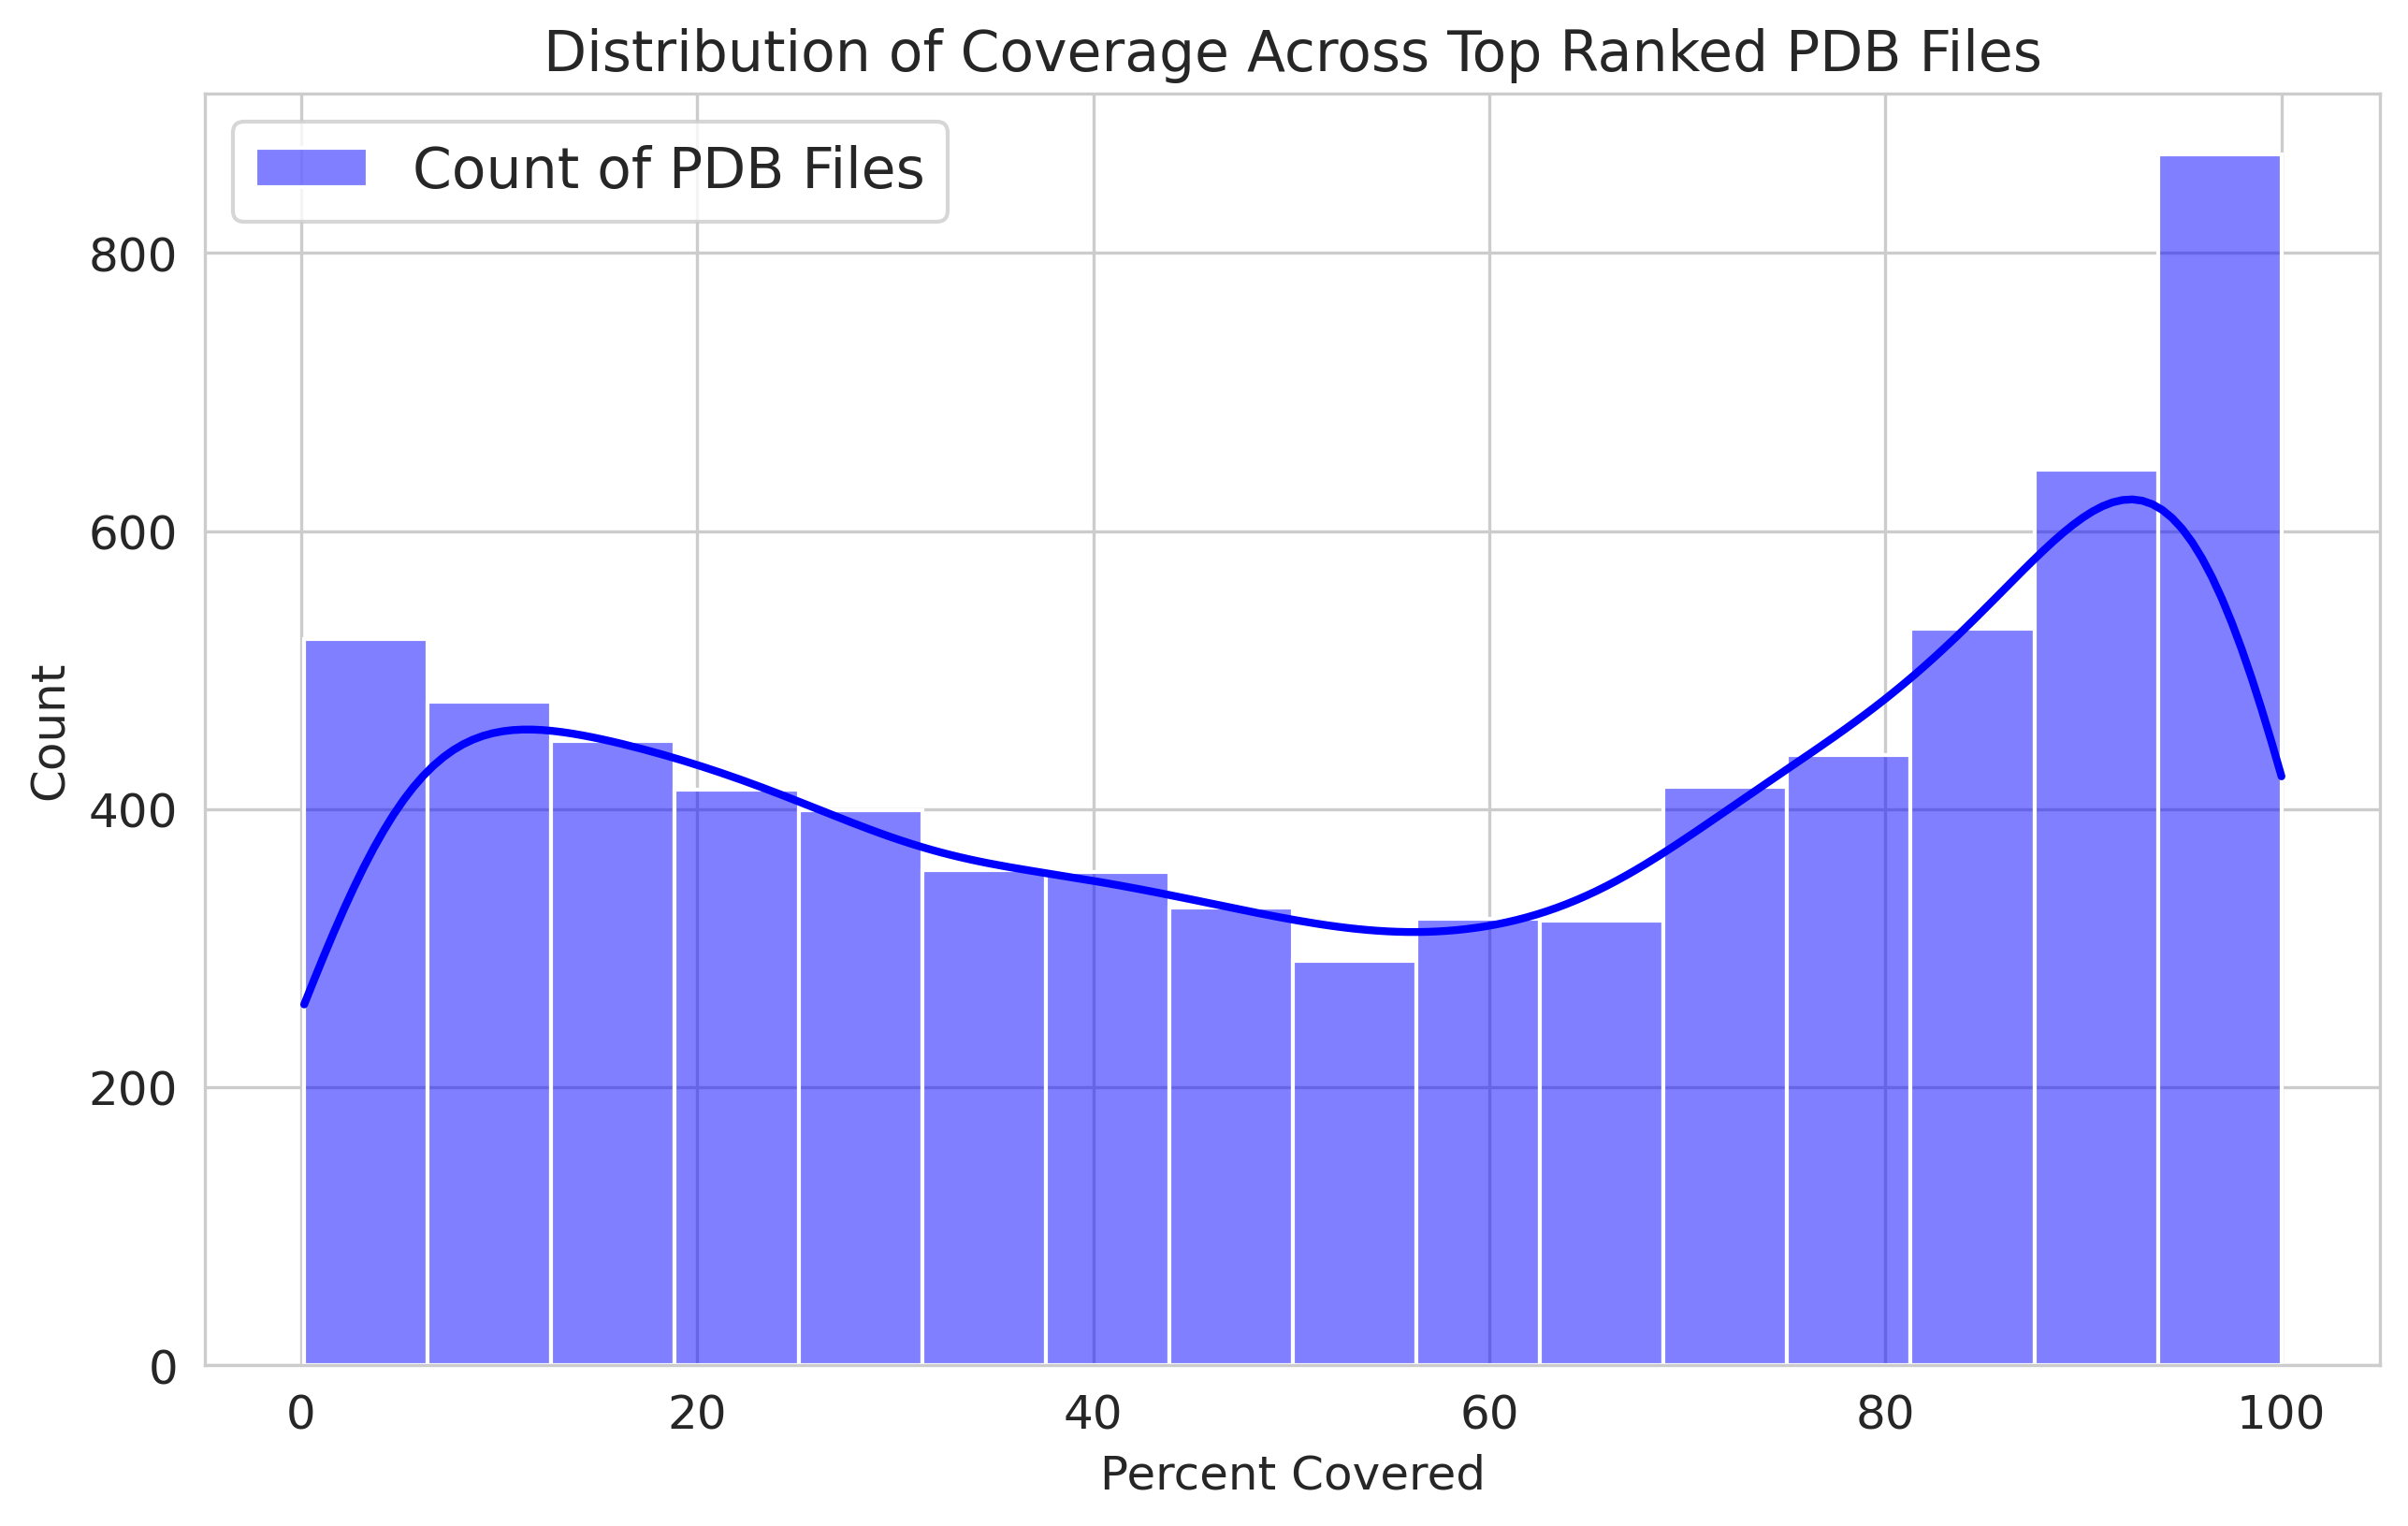

In [207]:
plt.figure(figsize=(10,6))
sns.histplot(df_under_100['Percent Covered'], color='blue', kde=True, label='Count of PDB Files')
plt.legend()
plt.xlabel('Percent Covered')
plt.title("Distribution of Coverage Across Top Ranked PDB Files")
plt.savefig("Figures/CoverageDistribution.svg", format = "svg")
plt.show()

### Distribution of alpha fold prediction on Proteins that have no missing residues

In [65]:
df.head(4)

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,PDB_Files_Ordered,BestRanked,Chain,Chain_id,Missing,Score_missing_res,AvgScore_missing,Score_Present_res,AvgScore_Present,Coverage,Percent Covered
0,Q9NQ94,reviewed,A1CF_HUMAN,APOBEC1 complementation factor (APOBEC1-stimul...,A1CF ACF ASP,Homo sapiens (Human),594,['2CPD'],2CPD,A=223-308,['A'],"[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...","{1: 38.84, 2: 34.59, 3: 40.94, 4: 36.54, 5: 40...",88.251889,"{216: 92.99, 217: 87.01, 218: 81.08, 219: 77.3...",59.218305,99,16.666667
1,Q8N5Z0,reviewed,AADAT_HUMAN,Kynurenine/alpha-aminoadipate aminotransferase...,AADAT KAT2 KYAT2,Homo sapiens (Human),425,"['6D0A', '4GEB', '4GE9', '4GE7', '6T8Q', '5EFS...",6D0A,A=1-425,['A'],[[]],{},NaN,"{1: 91.11, 2: 94.99, 3: 98.31, 4: 97.89, 5: 97...",97.346289,431,101.411765
2,Q2M2I8,reviewed,AAK1_HUMAN,AP2-associated protein kinase 1 (EC 2.7.11.1) ...,AAK1 KIAA1048,Homo sapiens (Human),961,"['5TE0', '4WSQ', '5L4Q']",5TE0,A=27-365,['A'],"[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...","{1: 35.91, 2: 36.37, 3: 42.4, 4: 40.09, 5: 44....",43.657629,"{26: 34.15, 27: 34.61, 28: 34.23, 29: 38.85, 3...",59.230876,316,32.882414
3,Q9H7C9,reviewed,AAMDC_HUMAN,Mth938 domain-containing protein (Adipogenesis...,AAMDC C11orf67 PTD015,Homo sapiens (Human),122,"['2Q4Q', '2AB1']",2Q4Q,A/B=2-122,['A'],"[[14, 71]]","{14: 98.56, 71: 97.39}",97.975000,"{1: 83.79, 2: 94.44, 3: 98.0, 4: 98.05, 5: 98....",97.757630,120,98.360656


In [5]:
full_cov_df = df[(df["Percent Covered"] >= 100) & (df["AvgScore_missing"].isnull())]
full_cov_df

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,PDB_Files_Ordered,BestRanked,Chain,Chain_id,Missing,Score_missing_res,AvgScore_missing,Score_Present_res,AvgScore_Present,Coverage,Percent Covered,PDB Length
1,Q8N5Z0,reviewed,AADAT_HUMAN,Kynurenine/alpha-aminoadipate aminotransferase...,AADAT KAT2 KYAT2,Homo sapiens (Human),425,"['6D0A', '4GEB', '4GE9', '4GE7', '6T8Q', '5EFS...",6D0A,A=1-425,['A'],[[]],{},NaN,"{1: 91.11, 2: 94.99, 3: 98.31, 4: 97.89, 5: 97...",97.346289,431,101.411765,425.0
31,Q9P1F3,reviewed,ABRAL_HUMAN,Costars family protein ABRACL (ABRA C-terminal...,ABRACL C6orf115 HSPC280 PRO2013,Homo sapiens (Human),81,['2L2O'],2L2O,A=1-81,['A'],[[]],{},NaN,"{1: 62.0, 2: 83.89, 3: 87.5, 4: 91.29, 5: 93.5...",95.018713,85,104.938272,81.0
51,Q8N6N7,reviewed,ACBD7_HUMAN,Acyl-CoA-binding domain-containing protein 7,ACBD7,Homo sapiens (Human),88,['3EPY'],3EPY,A/B=1-88,['A'],[[]],{},NaN,"{1: 59.86, 2: 76.47, 3: 84.74, 4: 86.16, 5: 91...",92.468009,88,100.000000,88.0
53,Q9NUN7,reviewed,ACER3_HUMAN,Alkaline ceramidase 3 (AlkCDase 3) (Alkaline C...,ACER3 APHC PHCA,Homo sapiens (Human),267,"['6YXH', '6G7O']",6YXH,A=2-244,['A'],[[]],{},NaN,"{1: 40.05, 2: 38.4, 3: 47.84, 4: 56.49, 5: 69....",93.440327,350,131.086142,243.0
67,P24666,reviewed,PPAC_HUMAN,Low molecular weight phosphotyrosine protein p...,ACP1,Homo sapiens (Human),158,"['4Z99', '4Z9B', '1XWW', '5PNT', '7KH8', '5JNT...",4Z99,A=1-158,['A'],[[]],{},NaN,"{1: 38.28, 2: 45.86, 3: 51.1, 4: 61.16, 5: 77....",96.133410,164,103.797468,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,P55769,reviewed,NH2L1_HUMAN,NHP2-like protein 1 (High mobility group-like ...,SNU13 NHP2L1,Homo sapiens (Human),128,"['3SIV', '2OZB', '3SIU', '1E7K', '5O9Z', '3JCR...",3SIV,A/D/G/J=1-128,['A'],[[]],{},NaN,"{1: 41.75, 2: 47.7, 3: 53.69, 4: 61.74, 5: 76....",95.046472,128,100.000000,128.0
7556,Q9UI30,reviewed,TR112_HUMAN,Multifunctional methyltransferase subunit TRM1...,TRMT112 AD-001 HSPC152 HSPC170,Homo sapiens (Human),125,"['6PED', '6KMR', '6KHS', '6K0X', '7WTU', '7WTT...",6PED,B=1-125,['B'],[[]],{},NaN,"{1: 97.15, 2: 97.65, 3: 97.3, 4: 96.89, 5: 95....",93.277952,127,101.600000,125.0
7576,P68036,reviewed,UB2L3_HUMAN,Ubiquitin-conjugating enzyme E2 L3 (EC 2.3.2.2...,UBE2L3 UBCE7 UBCH7,Homo sapiens (Human),154,"['4Q5E', '4Q5H', '3SY2', '7V8F', '6CP2', '7OIK...",4Q5E,C=1-154,['C'],[[]],{},NaN,"{1: 68.31, 2: 84.34, 3: 88.48, 4: 89.07, 5: 91...",94.418323,155,100.649351,154.0
7578,Q15819,reviewed,UB2V2_HUMAN,Ubiquitin-conjugating enzyme E2 variant 2 (DDV...,UBE2V2 MMS2 UEV2,Homo sapiens (Human),145,"['7BBD', '7BBF', '4ONL', '4ONM', '4ONN', '4NR3...",7BBD,A=1-145,['A'],[[]],{},NaN,"{1: 42.36, 2: 45.73, 3: 50.63, 4: 49.33, 5: 54...",94.974594,149,102.758621,145.0


### According to our database 249 PDB files have full coverage

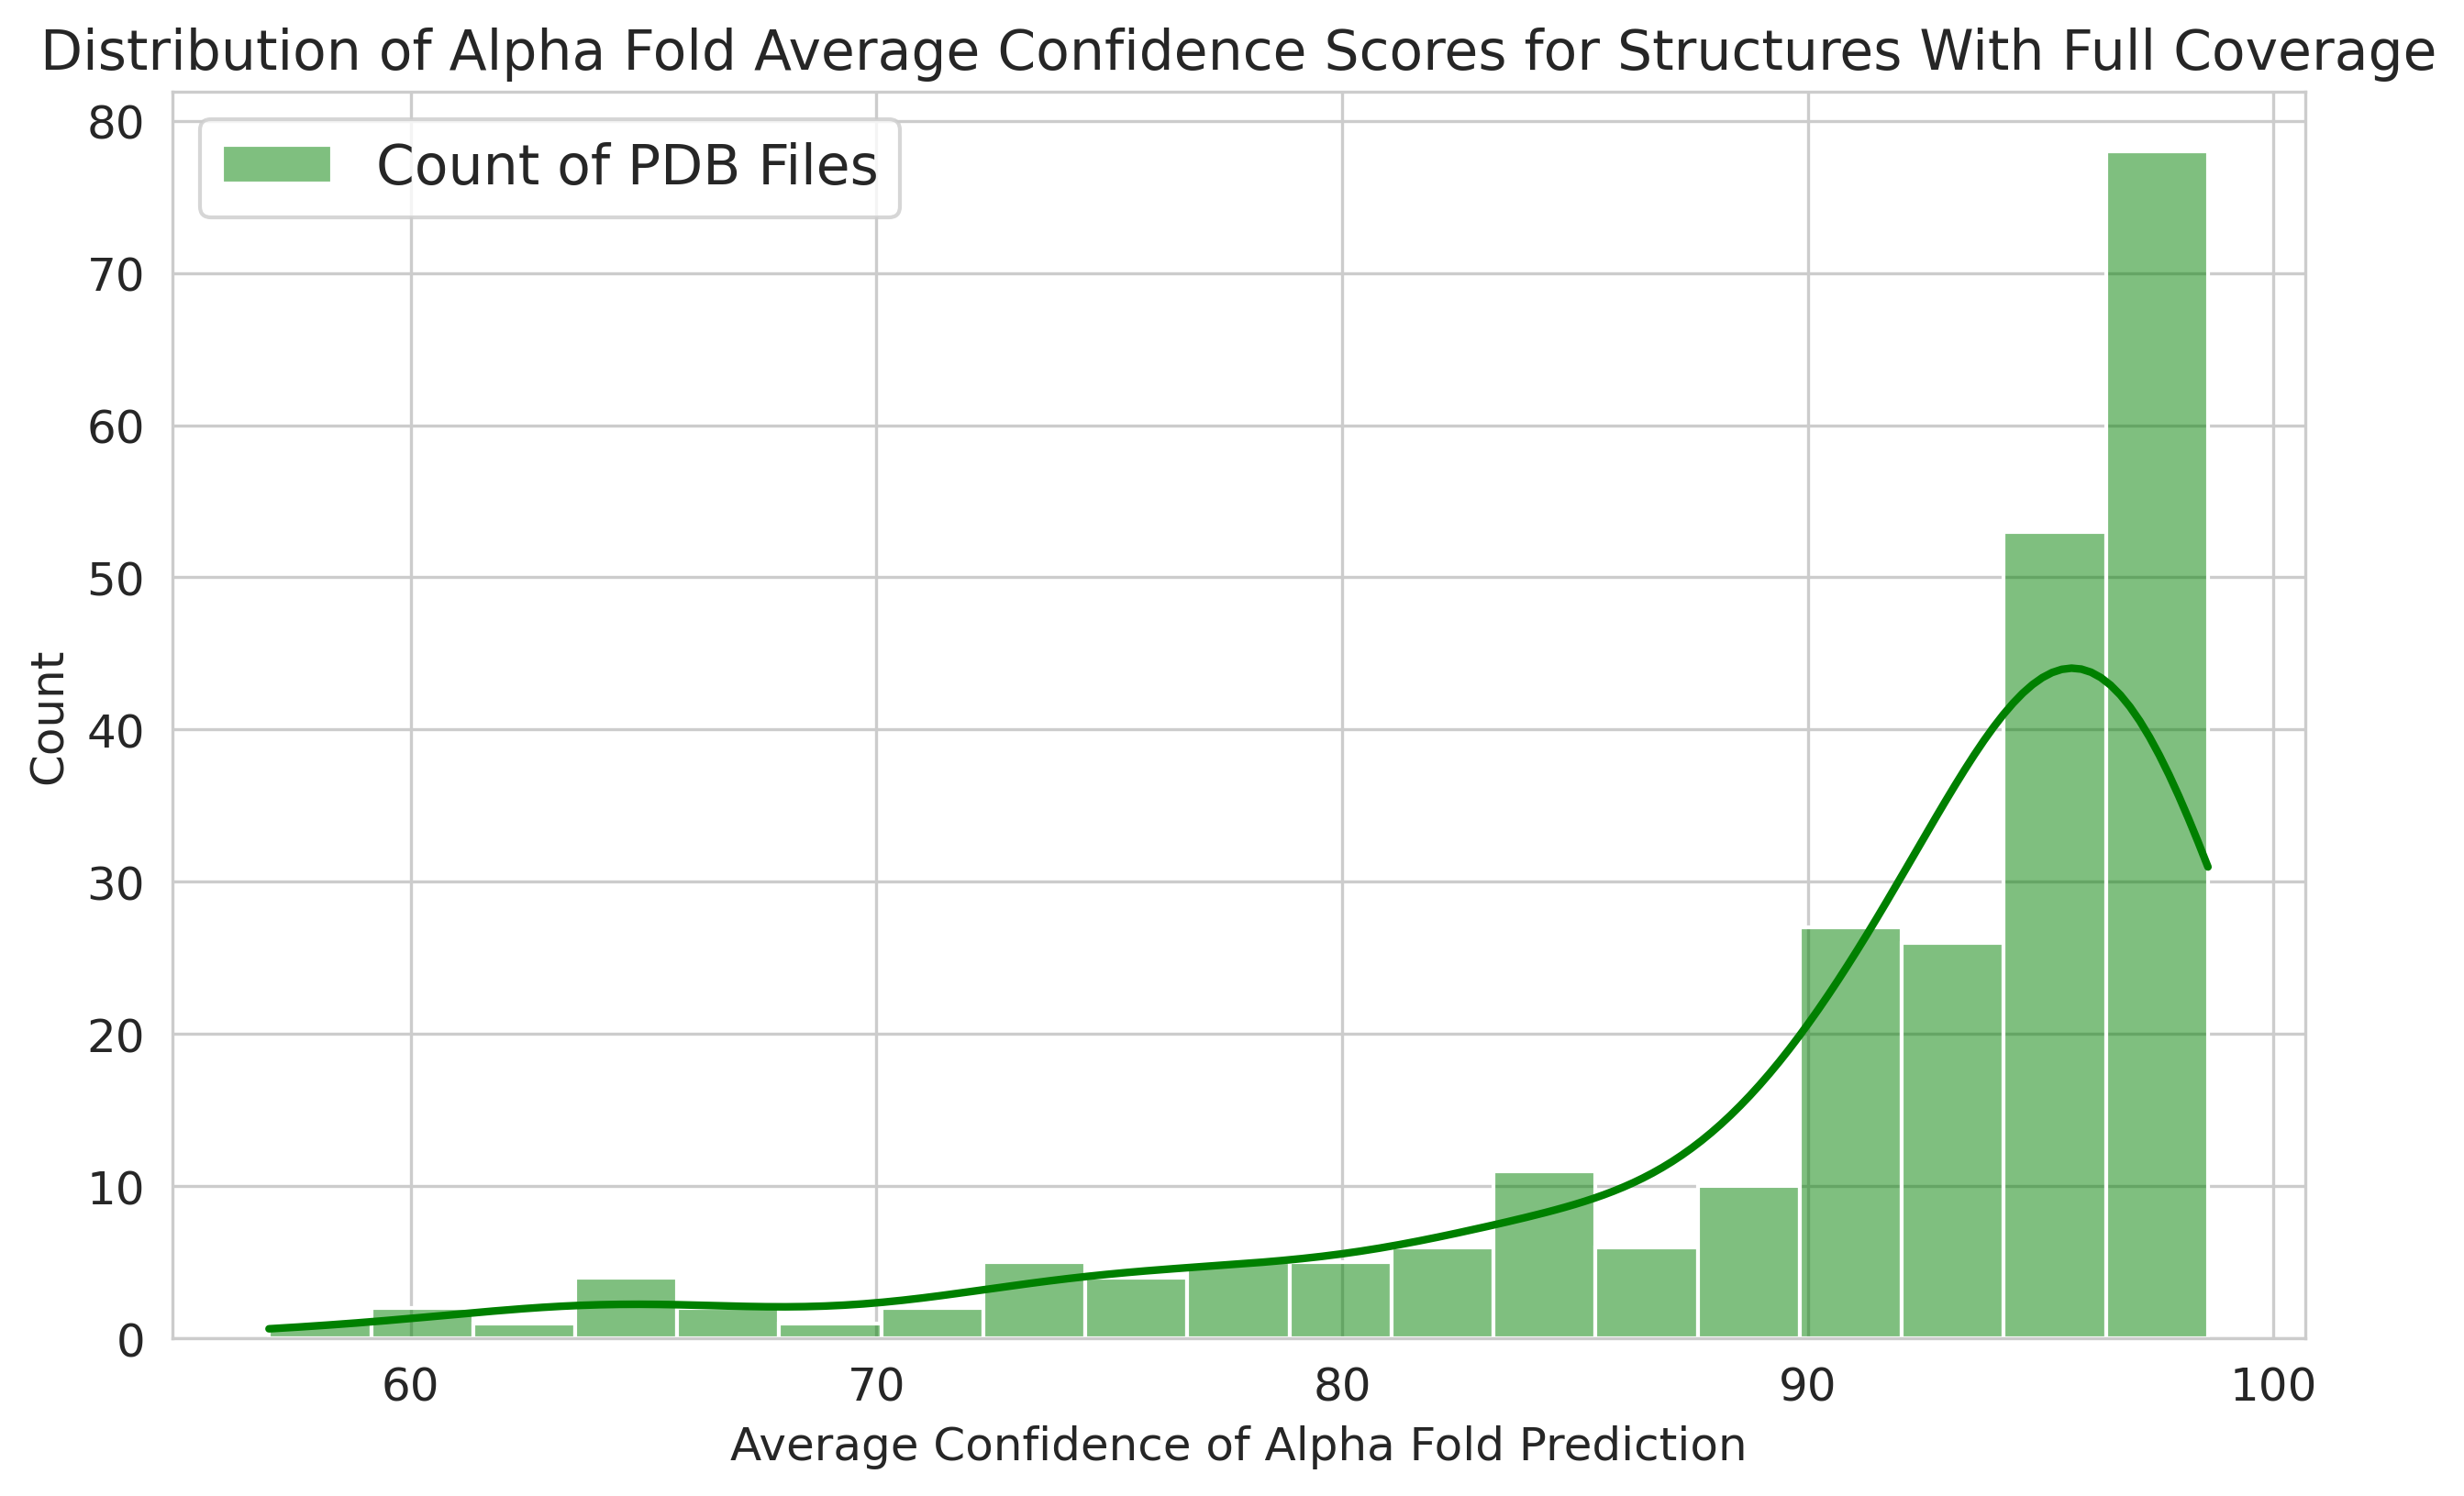

In [210]:
plt.figure(figsize=(10,6))
sns.histplot(full_cov_df['AvgScore_Present'], color='green', kde=True, label='Count of PDB Files')
plt.legend()
plt.xlabel('Average Confidence of Alpha Fold Prediction')
plt.title("Distribution of Alpha Fold Average Confidence Scores for Structures With Full Coverage")
plt.savefig("Figures/FullyCoveredConfidenceDis.svg", format="svg")
plt.show()

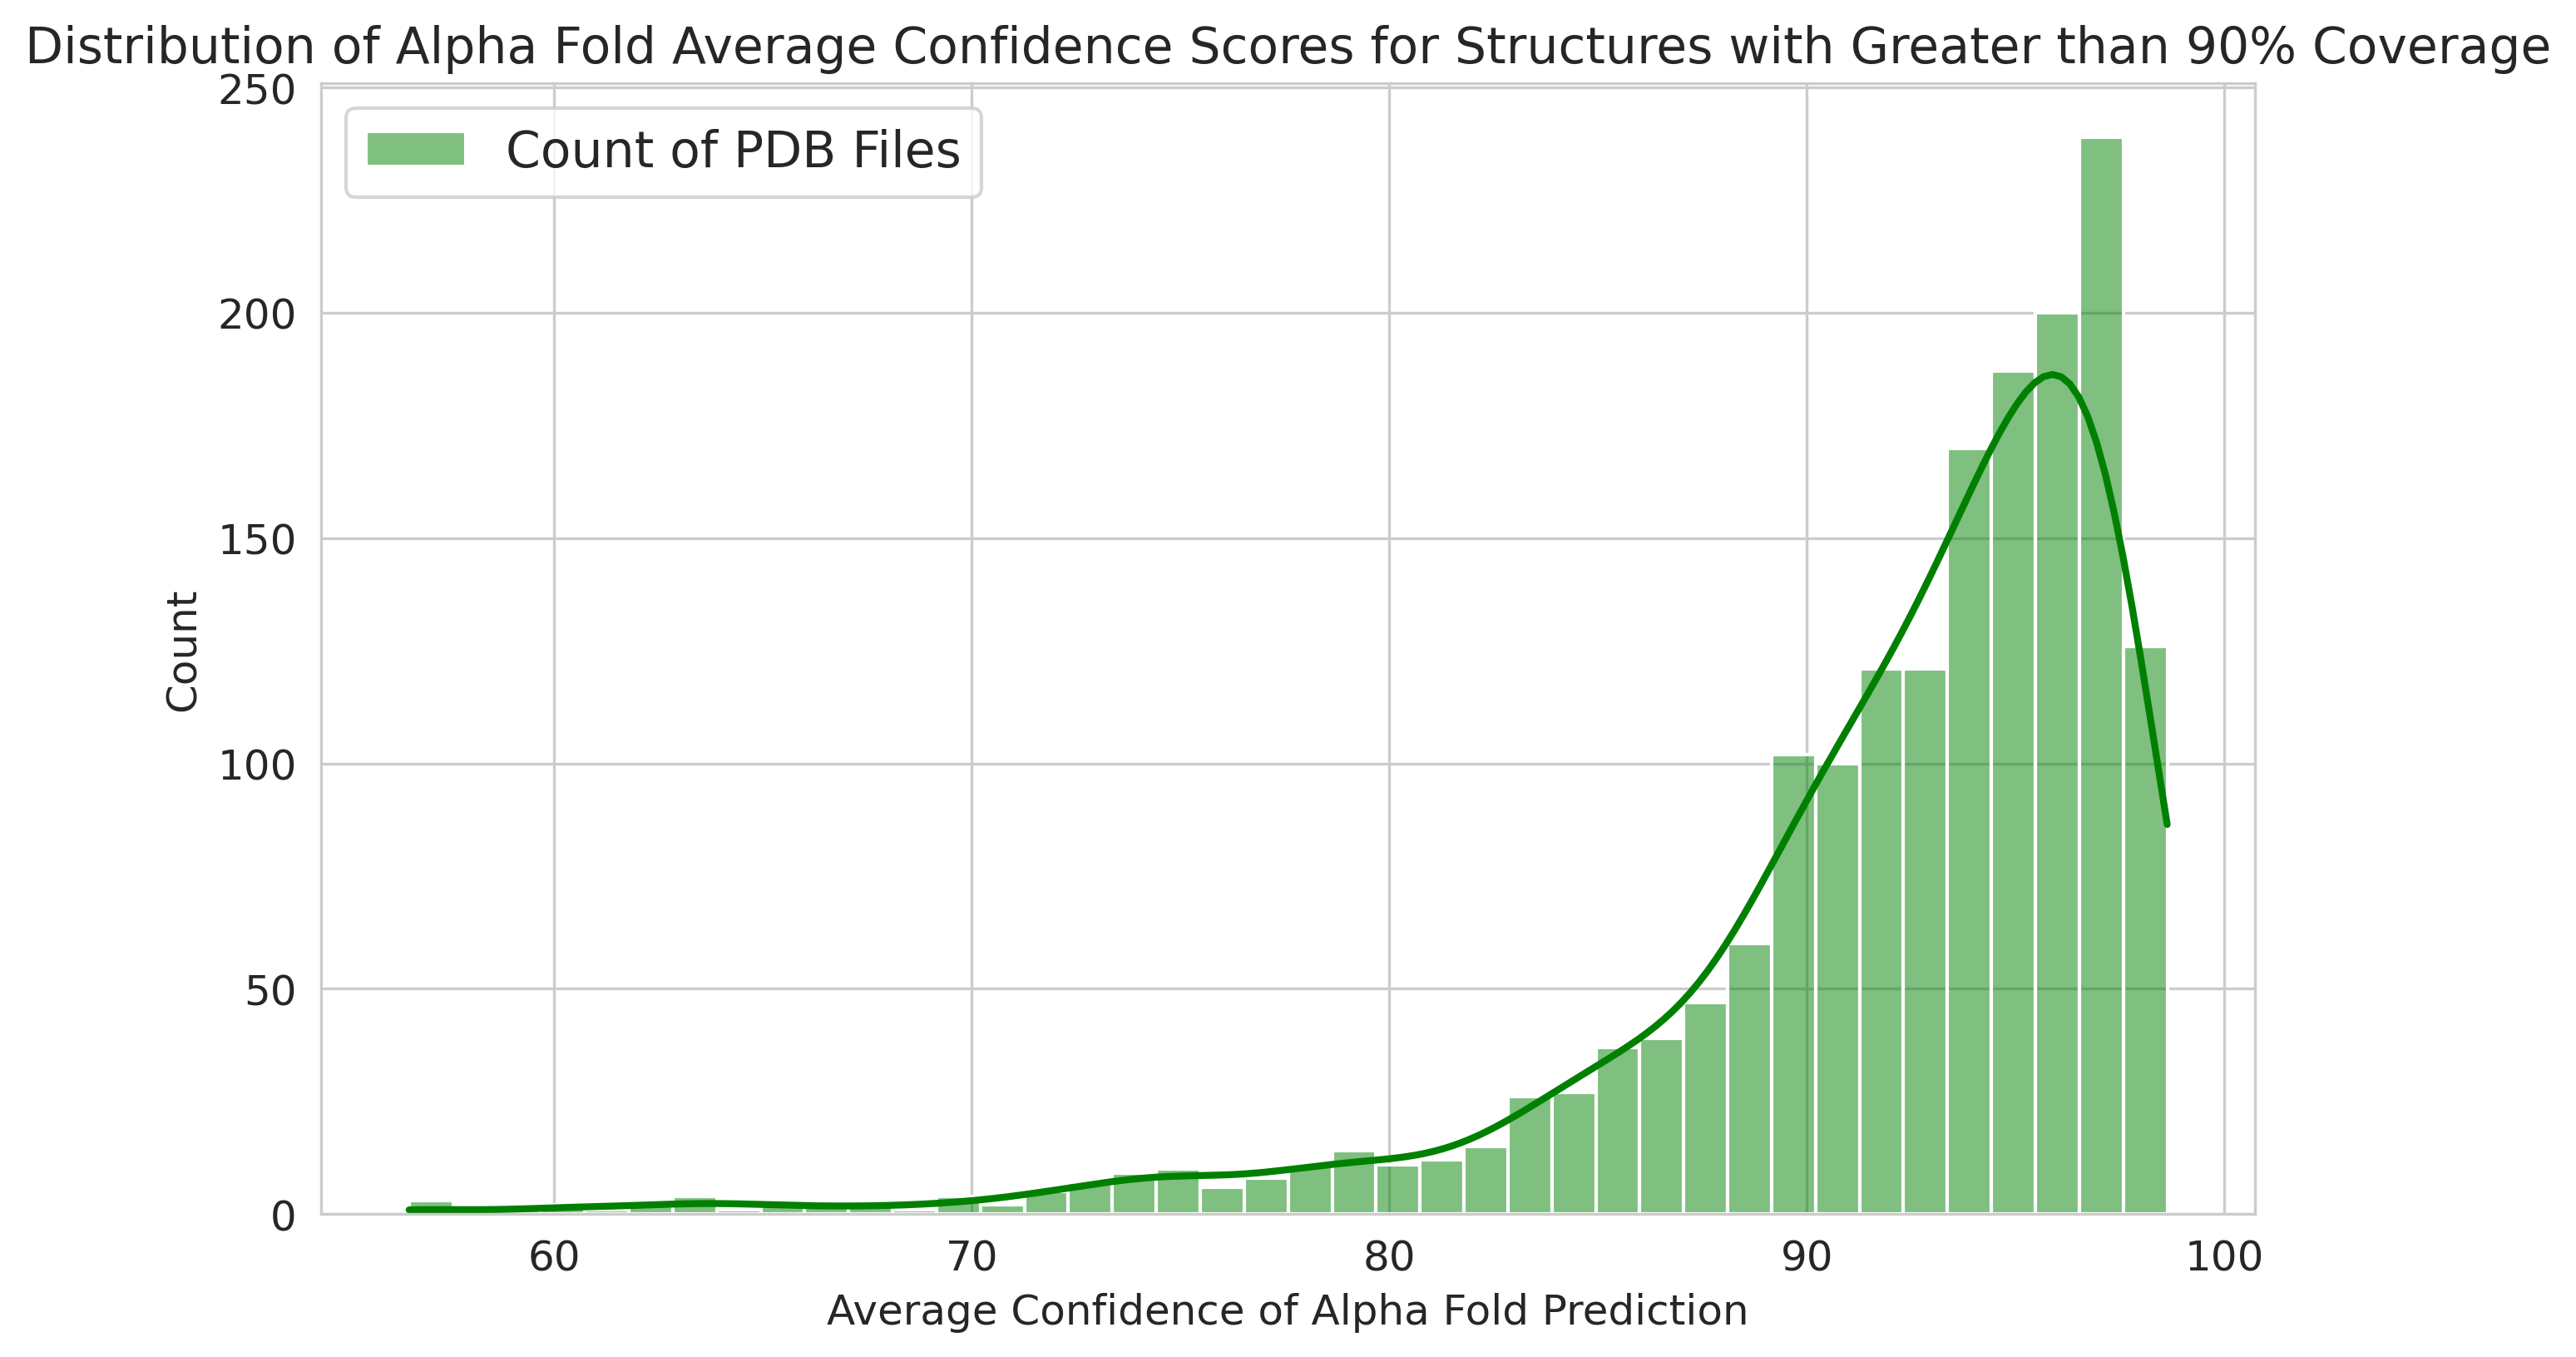

In [212]:
percent = 90 
full_cov_df = df[(df["Percent Covered"] >= percent)]
plt.figure(figsize=(10,6))
sns.histplot(full_cov_df['AvgScore_Present'], color='green', kde=True, label='Count of PDB Files')
plt.legend()
plt.xlabel('Average Confidence of Alpha Fold Prediction')
plt.title(f"Distribution of Alpha Fold Average Confidence Scores for Structures with Greater than {percent}% Coverage")
plt.savefig("Figures/90%ConfidenceDis.svg", format="svg")
plt.show()

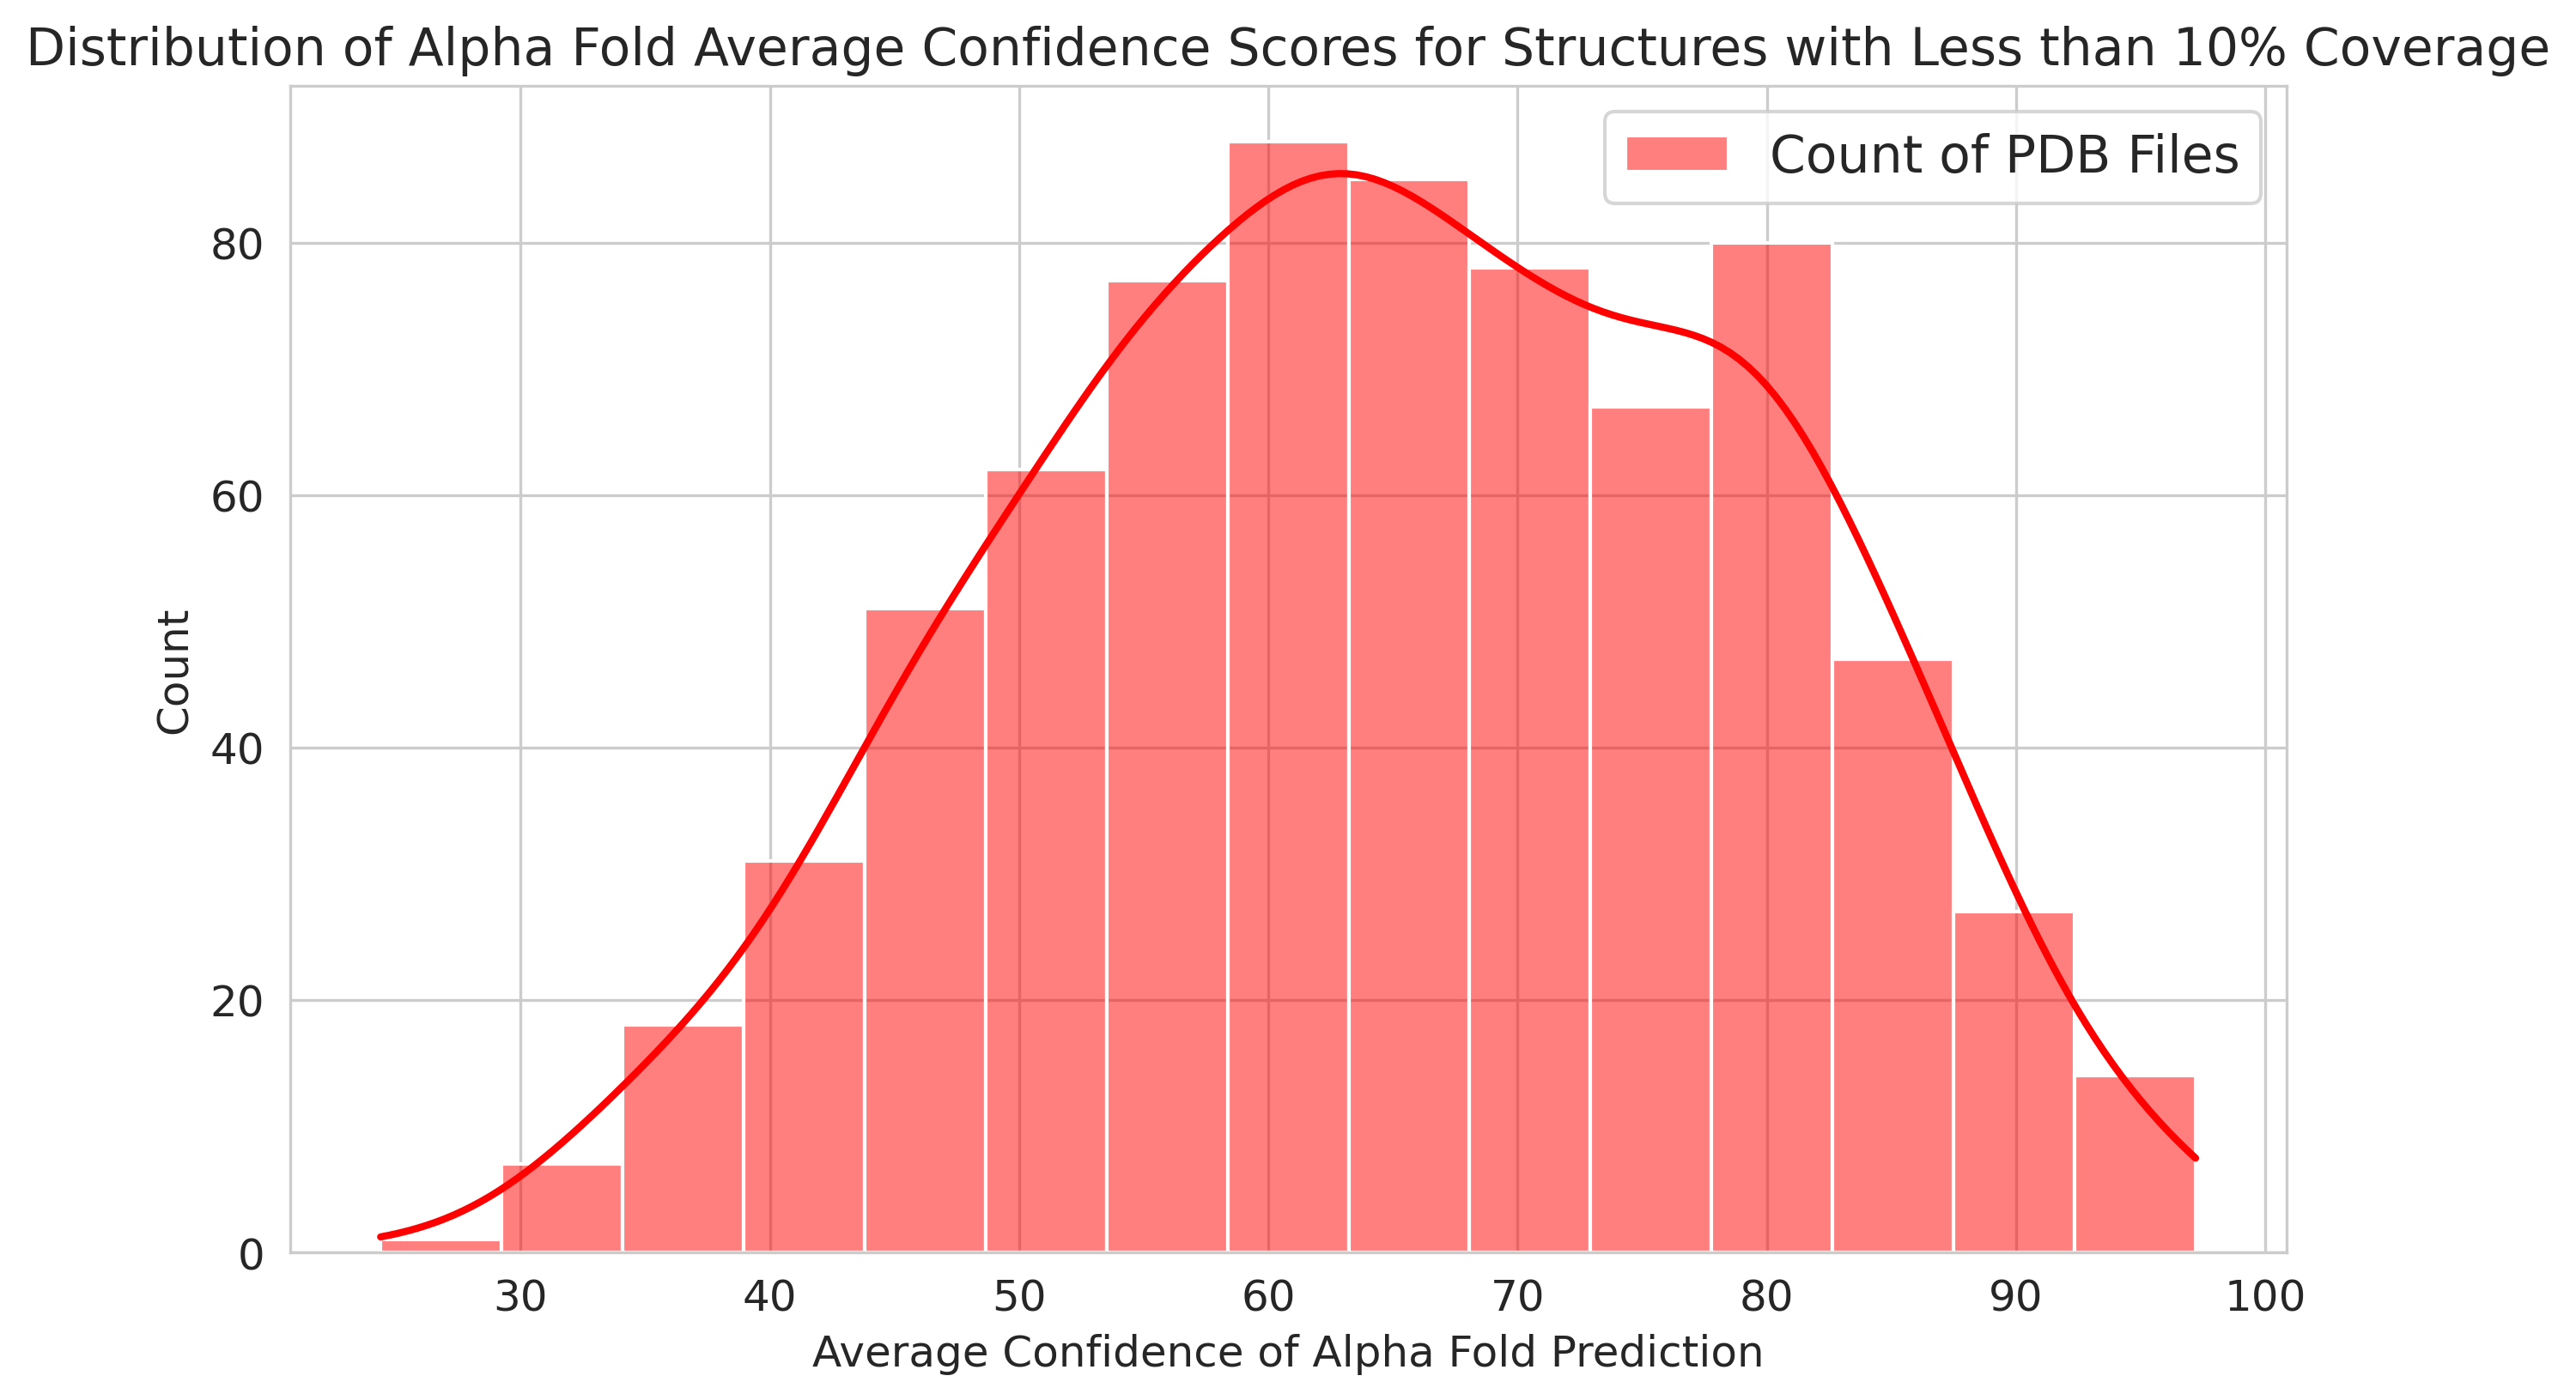

In [213]:
percent = 10
full_cov_df = df[(df["Percent Covered"] <= percent)]
plt.figure(figsize=(10,6))
sns.histplot(full_cov_df['AvgScore_Present'], color='red', kde=True, label='Count of PDB Files')
plt.legend()
plt.xlabel('Average Confidence of Alpha Fold Prediction')
plt.title(f"Distribution of Alpha Fold Average Confidence Scores for Structures with Less than {percent}% Coverage")
plt.savefig("Figures/less10%ConfidenceDis.svg", format="svg")
plt.show()

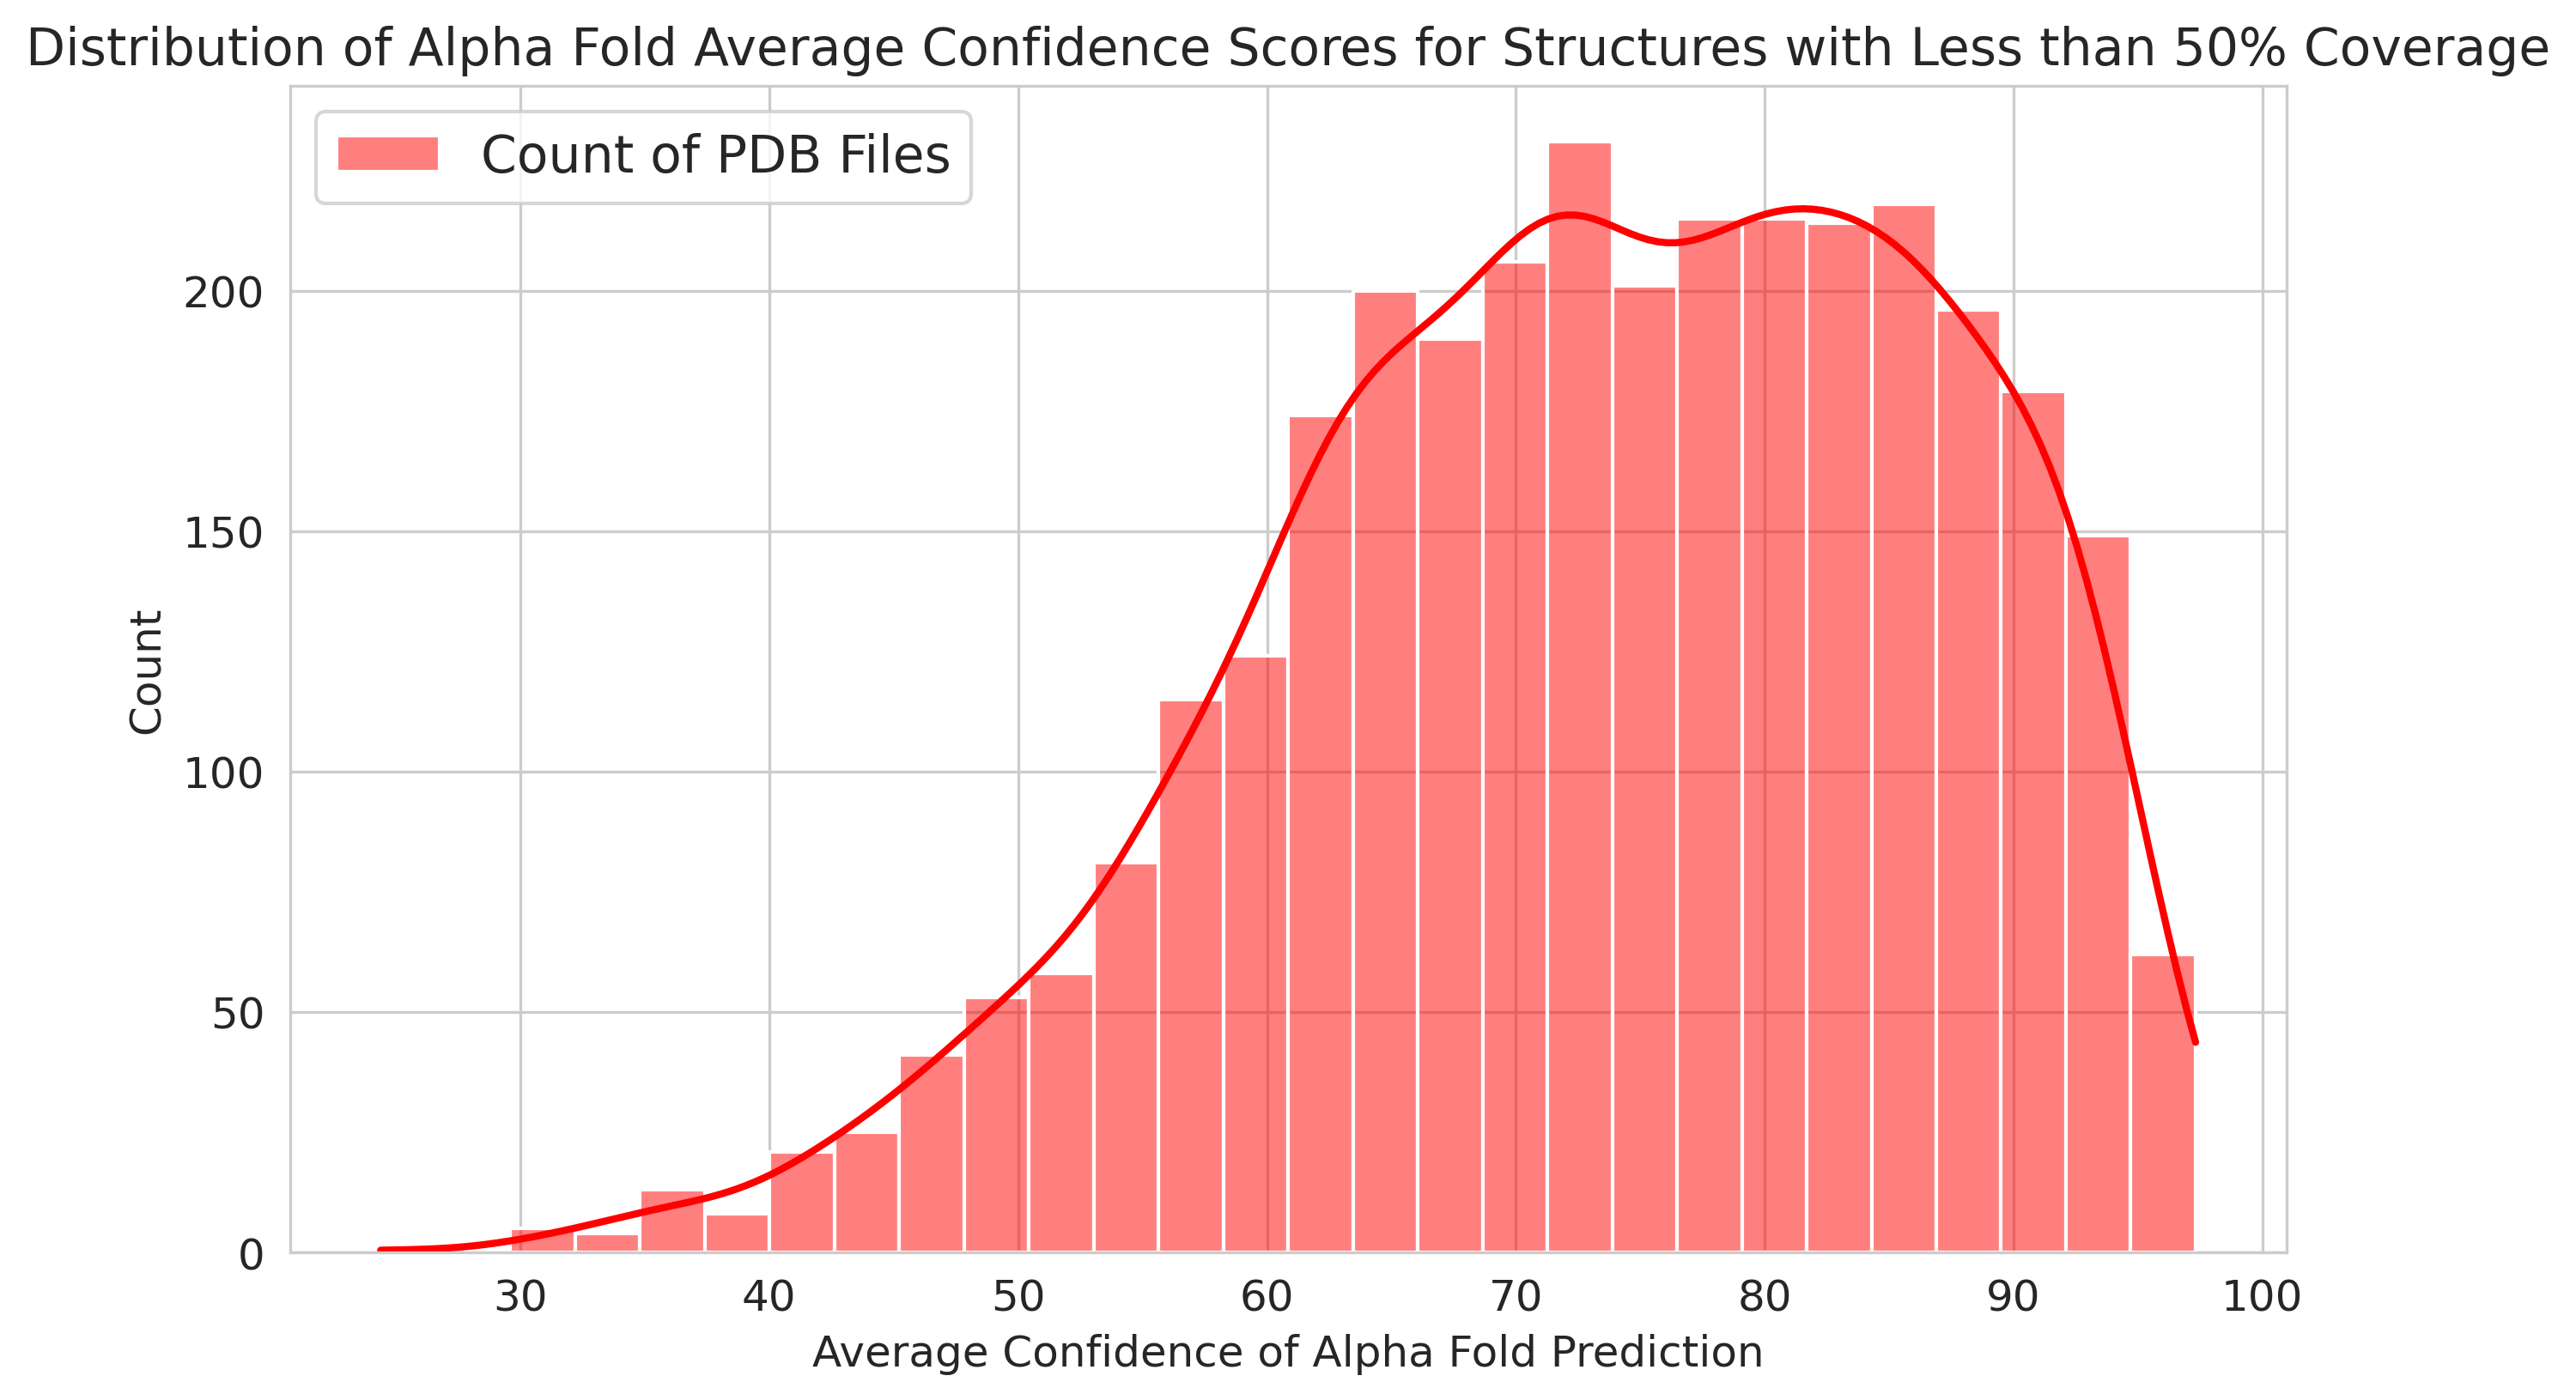

In [215]:
percent = 50
full_cov_df = df[(df["Percent Covered"] <= percent)]
plt.figure(figsize=(10,6))
sns.histplot(full_cov_df['AvgScore_Present'], color='red', kde=True, label='Count of PDB Files')
plt.legend()
plt.xlabel('Average Confidence of Alpha Fold Prediction')
plt.title(f"Distribution of Alpha Fold Average Confidence Scores for Structures with Less than {percent}% Coverage")
plt.savefig("Figures/less50%ConfidenceDis.svg", format="svg")
plt.show()

# Get Distribution of UniProt Sequence Lengths

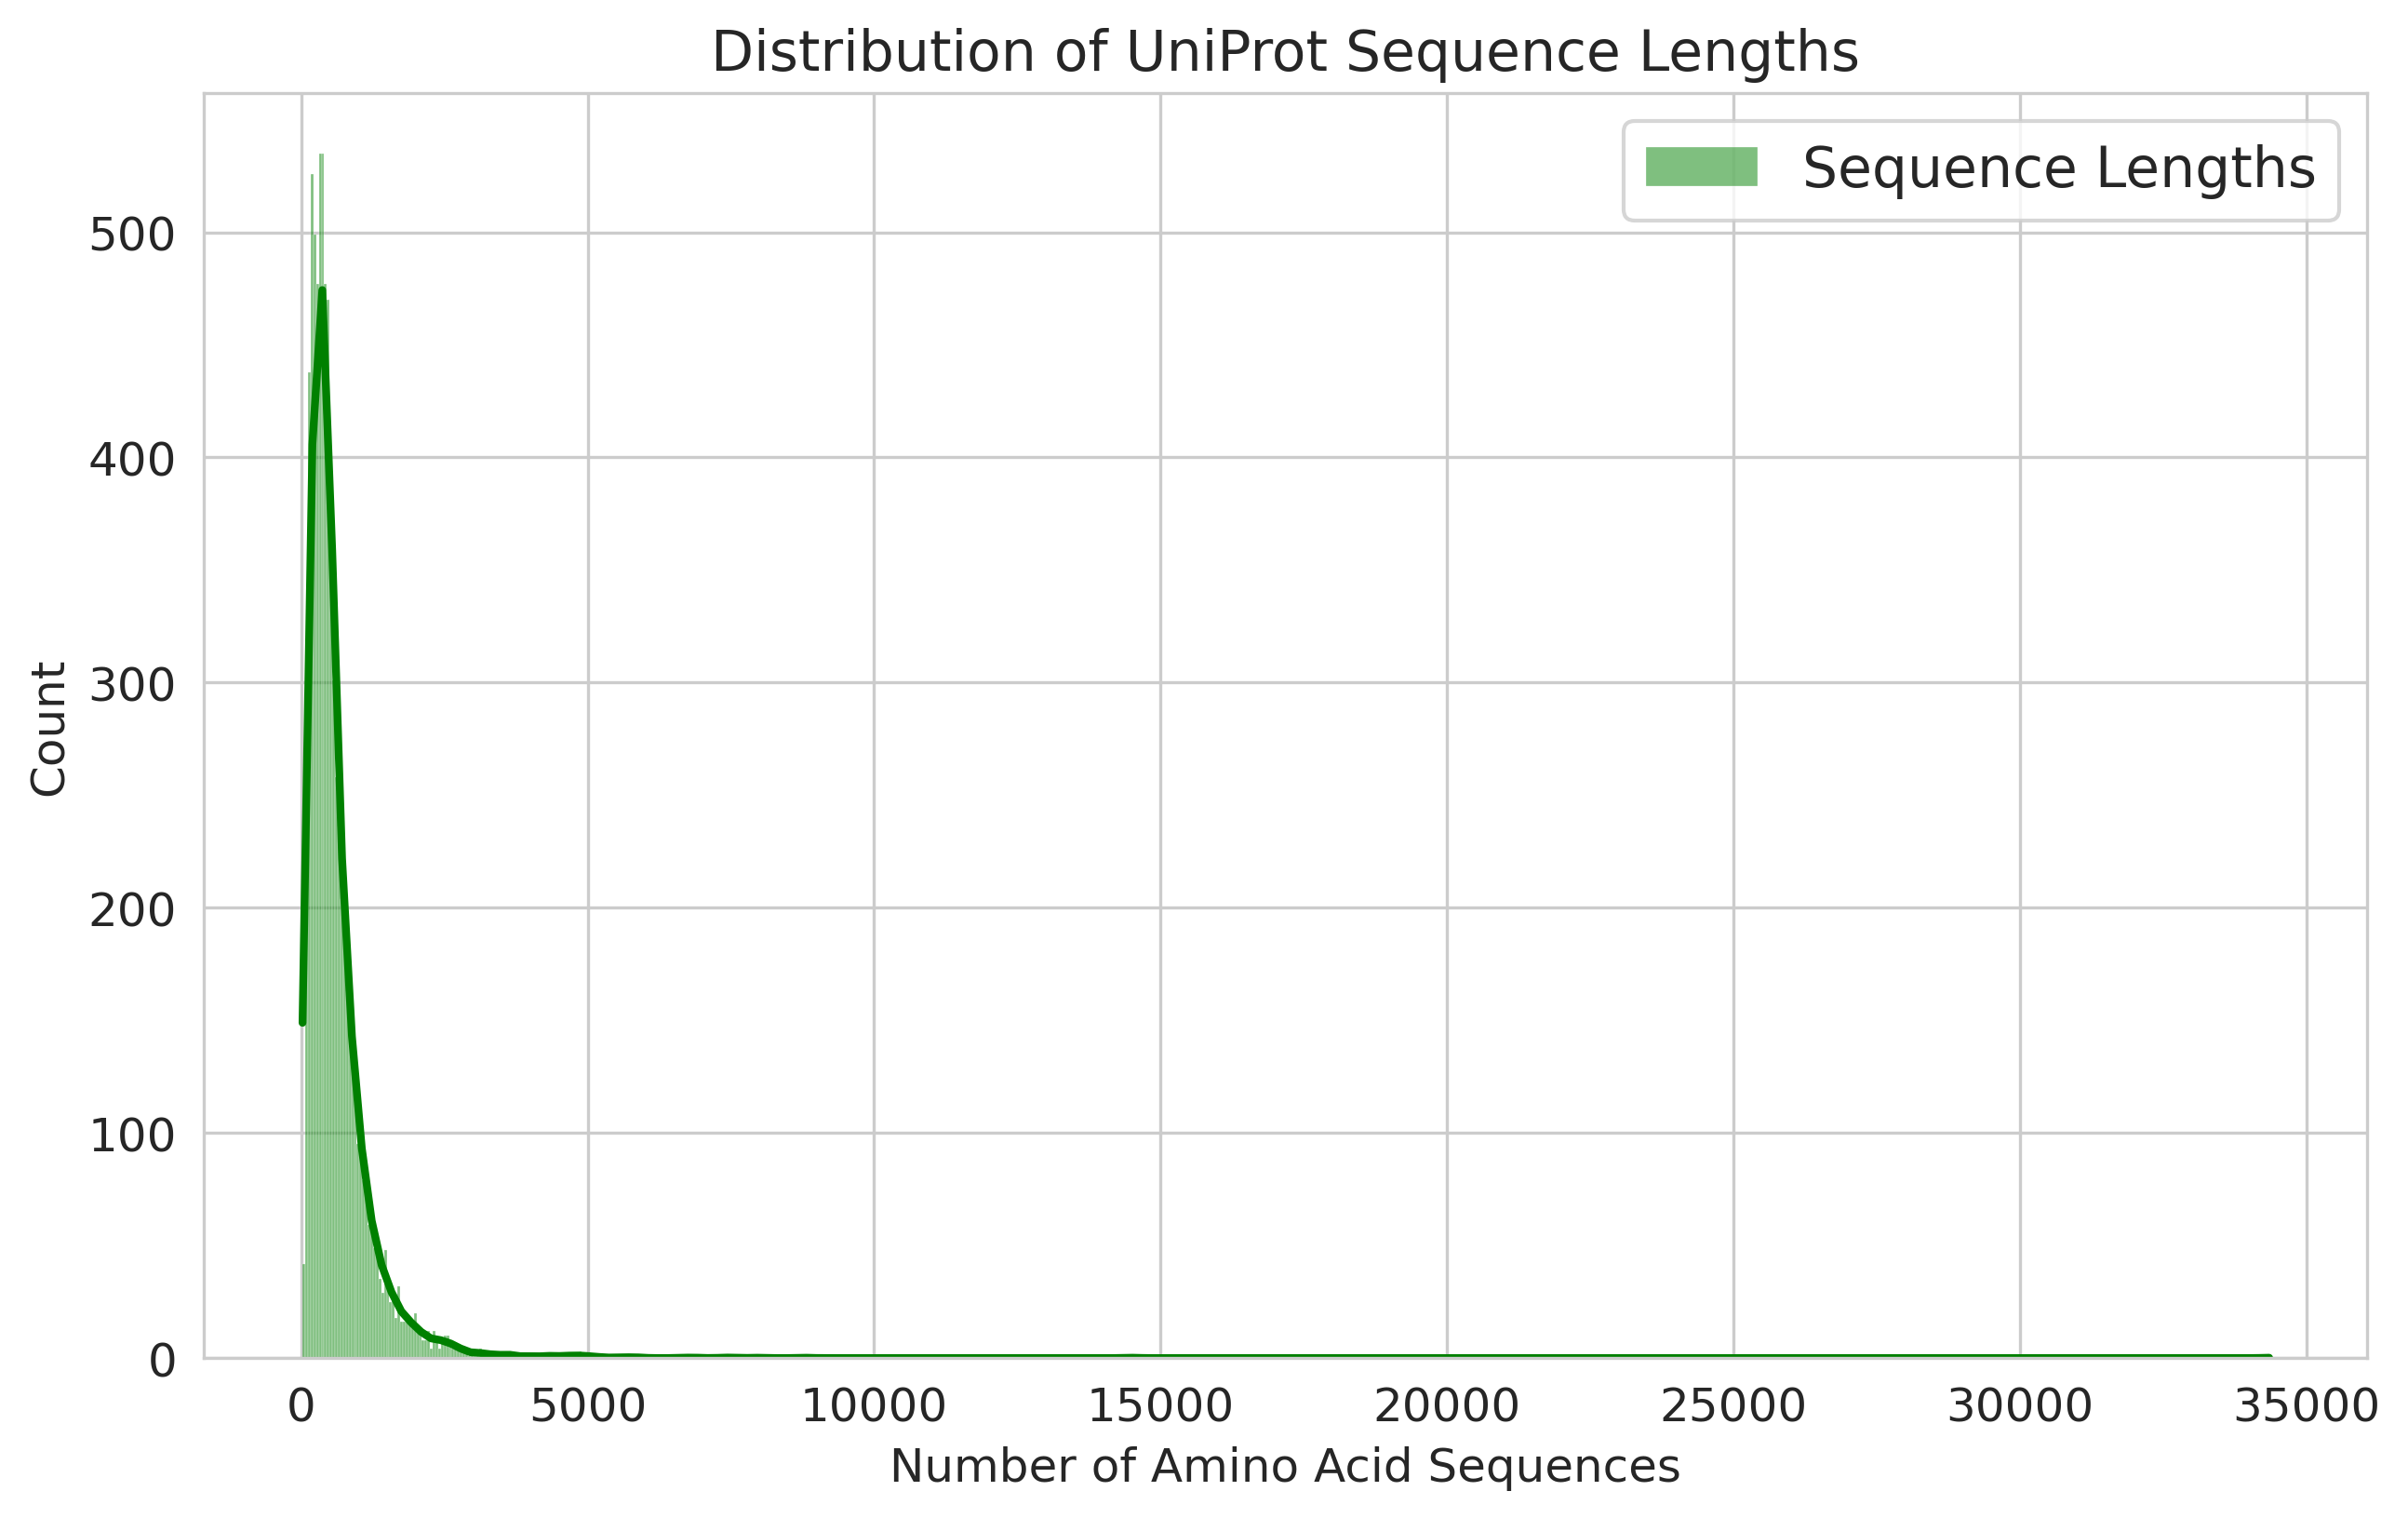

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(df['Length'], color='green', kde=True, label='Sequence Lengths')
plt.legend()
plt.xlabel('Number of Amino Acid Sequences')
plt.title(f"Distribution of UniProt Sequence Lengths")
plt.savefig("Figures/SequenceLengthDistribution.svg", format="svg")
plt.show()

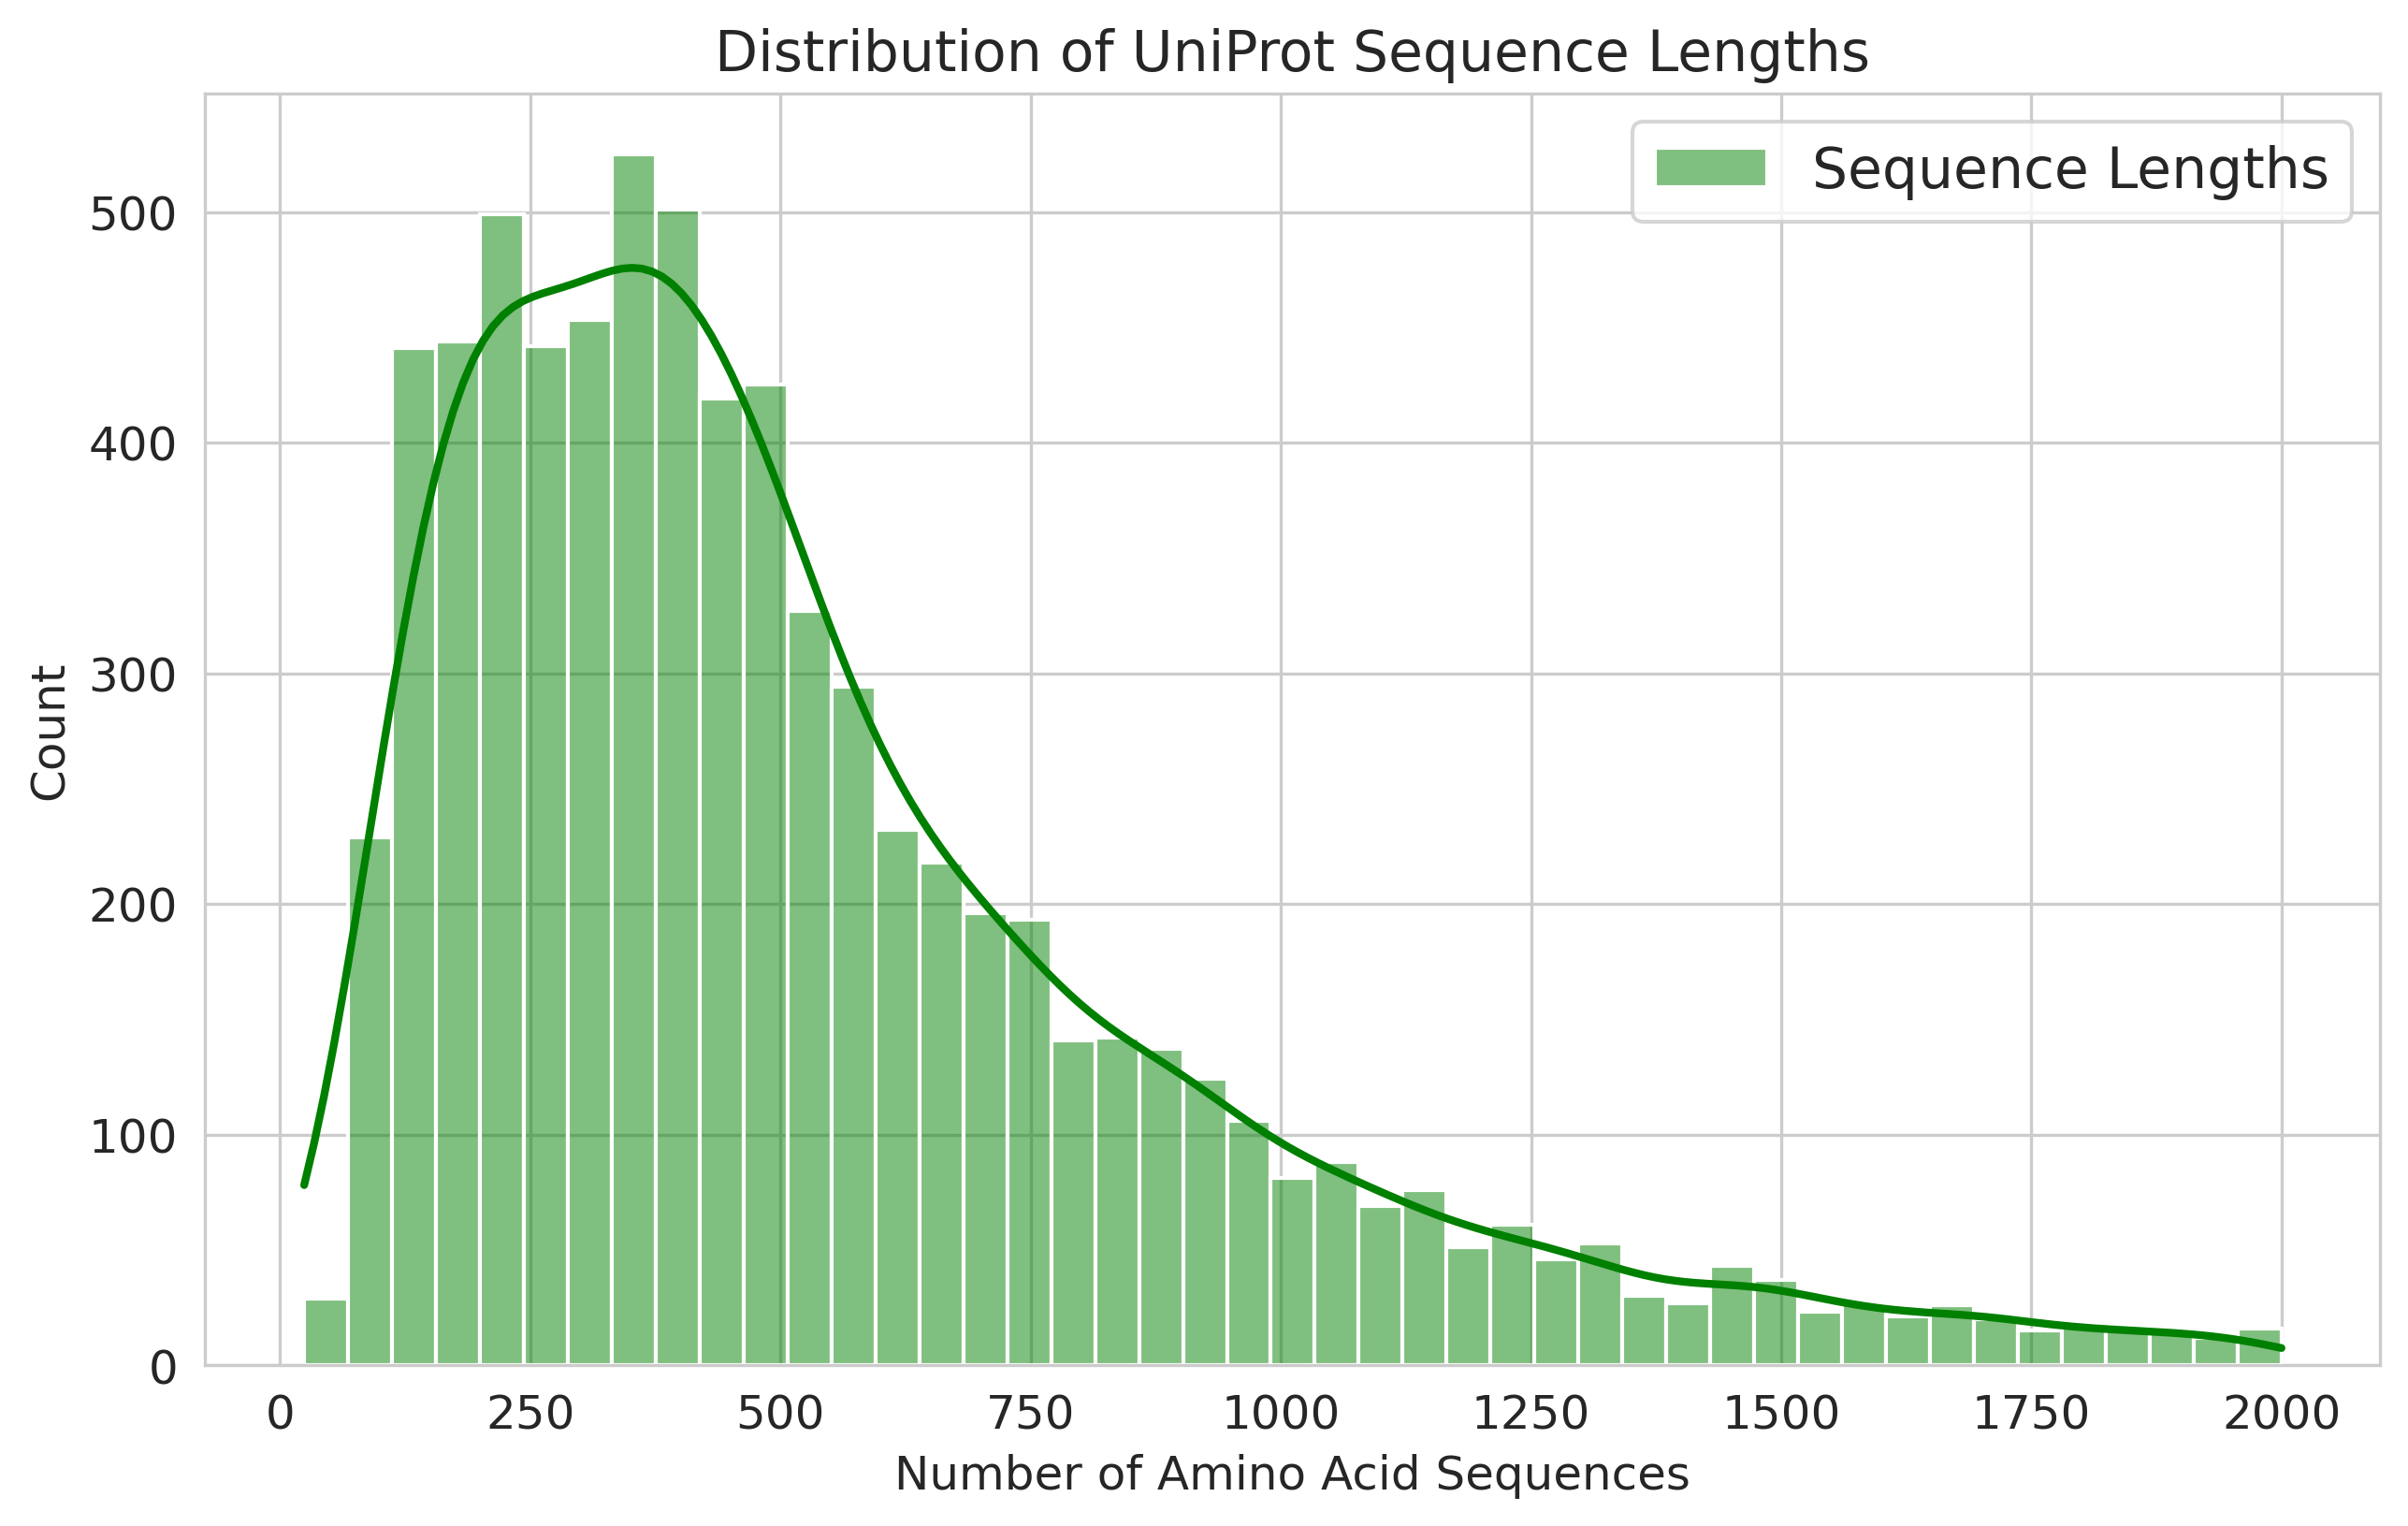

In [52]:
plt.figure(figsize=(10,6))
df_fil = df[(df["Length"] <= 2000)]
sns.histplot(df_fil['Length'], color='green', kde=True, label='Sequence Lengths')
plt.legend()
plt.xlabel('Number of Amino Acid Sequences')
plt.title(f"Distribution of UniProt Sequence Lengths")
plt.savefig("Figures/SequenceLengthDistribution.svg", format="svg")
plt.show()

# Distribution of PDB file Lengths

In [53]:
def calculate_difference_from_string(input_str):
    equations = input_str.split(',')

    differences = {}
    for equation in equations:
        variable, values = equation.split('=')
        num1_str, num2_str = values.split('-')
        try: 
            num1 = int(num1_str)
            num2 = int(num2_str)
        except: 
            #print(input_str) 
            return np.nan
            continue
        differences[variable.strip()] = num2 - num1 + 1
    total_diff = sum(differences.values())
    return total_diff

In [54]:
df['PDB Length'] = df['Chain'].apply(calculate_difference_from_string)

In [55]:
df.to_excel("Dataset.xlsx", index=False)

## Distribution of PDB Length

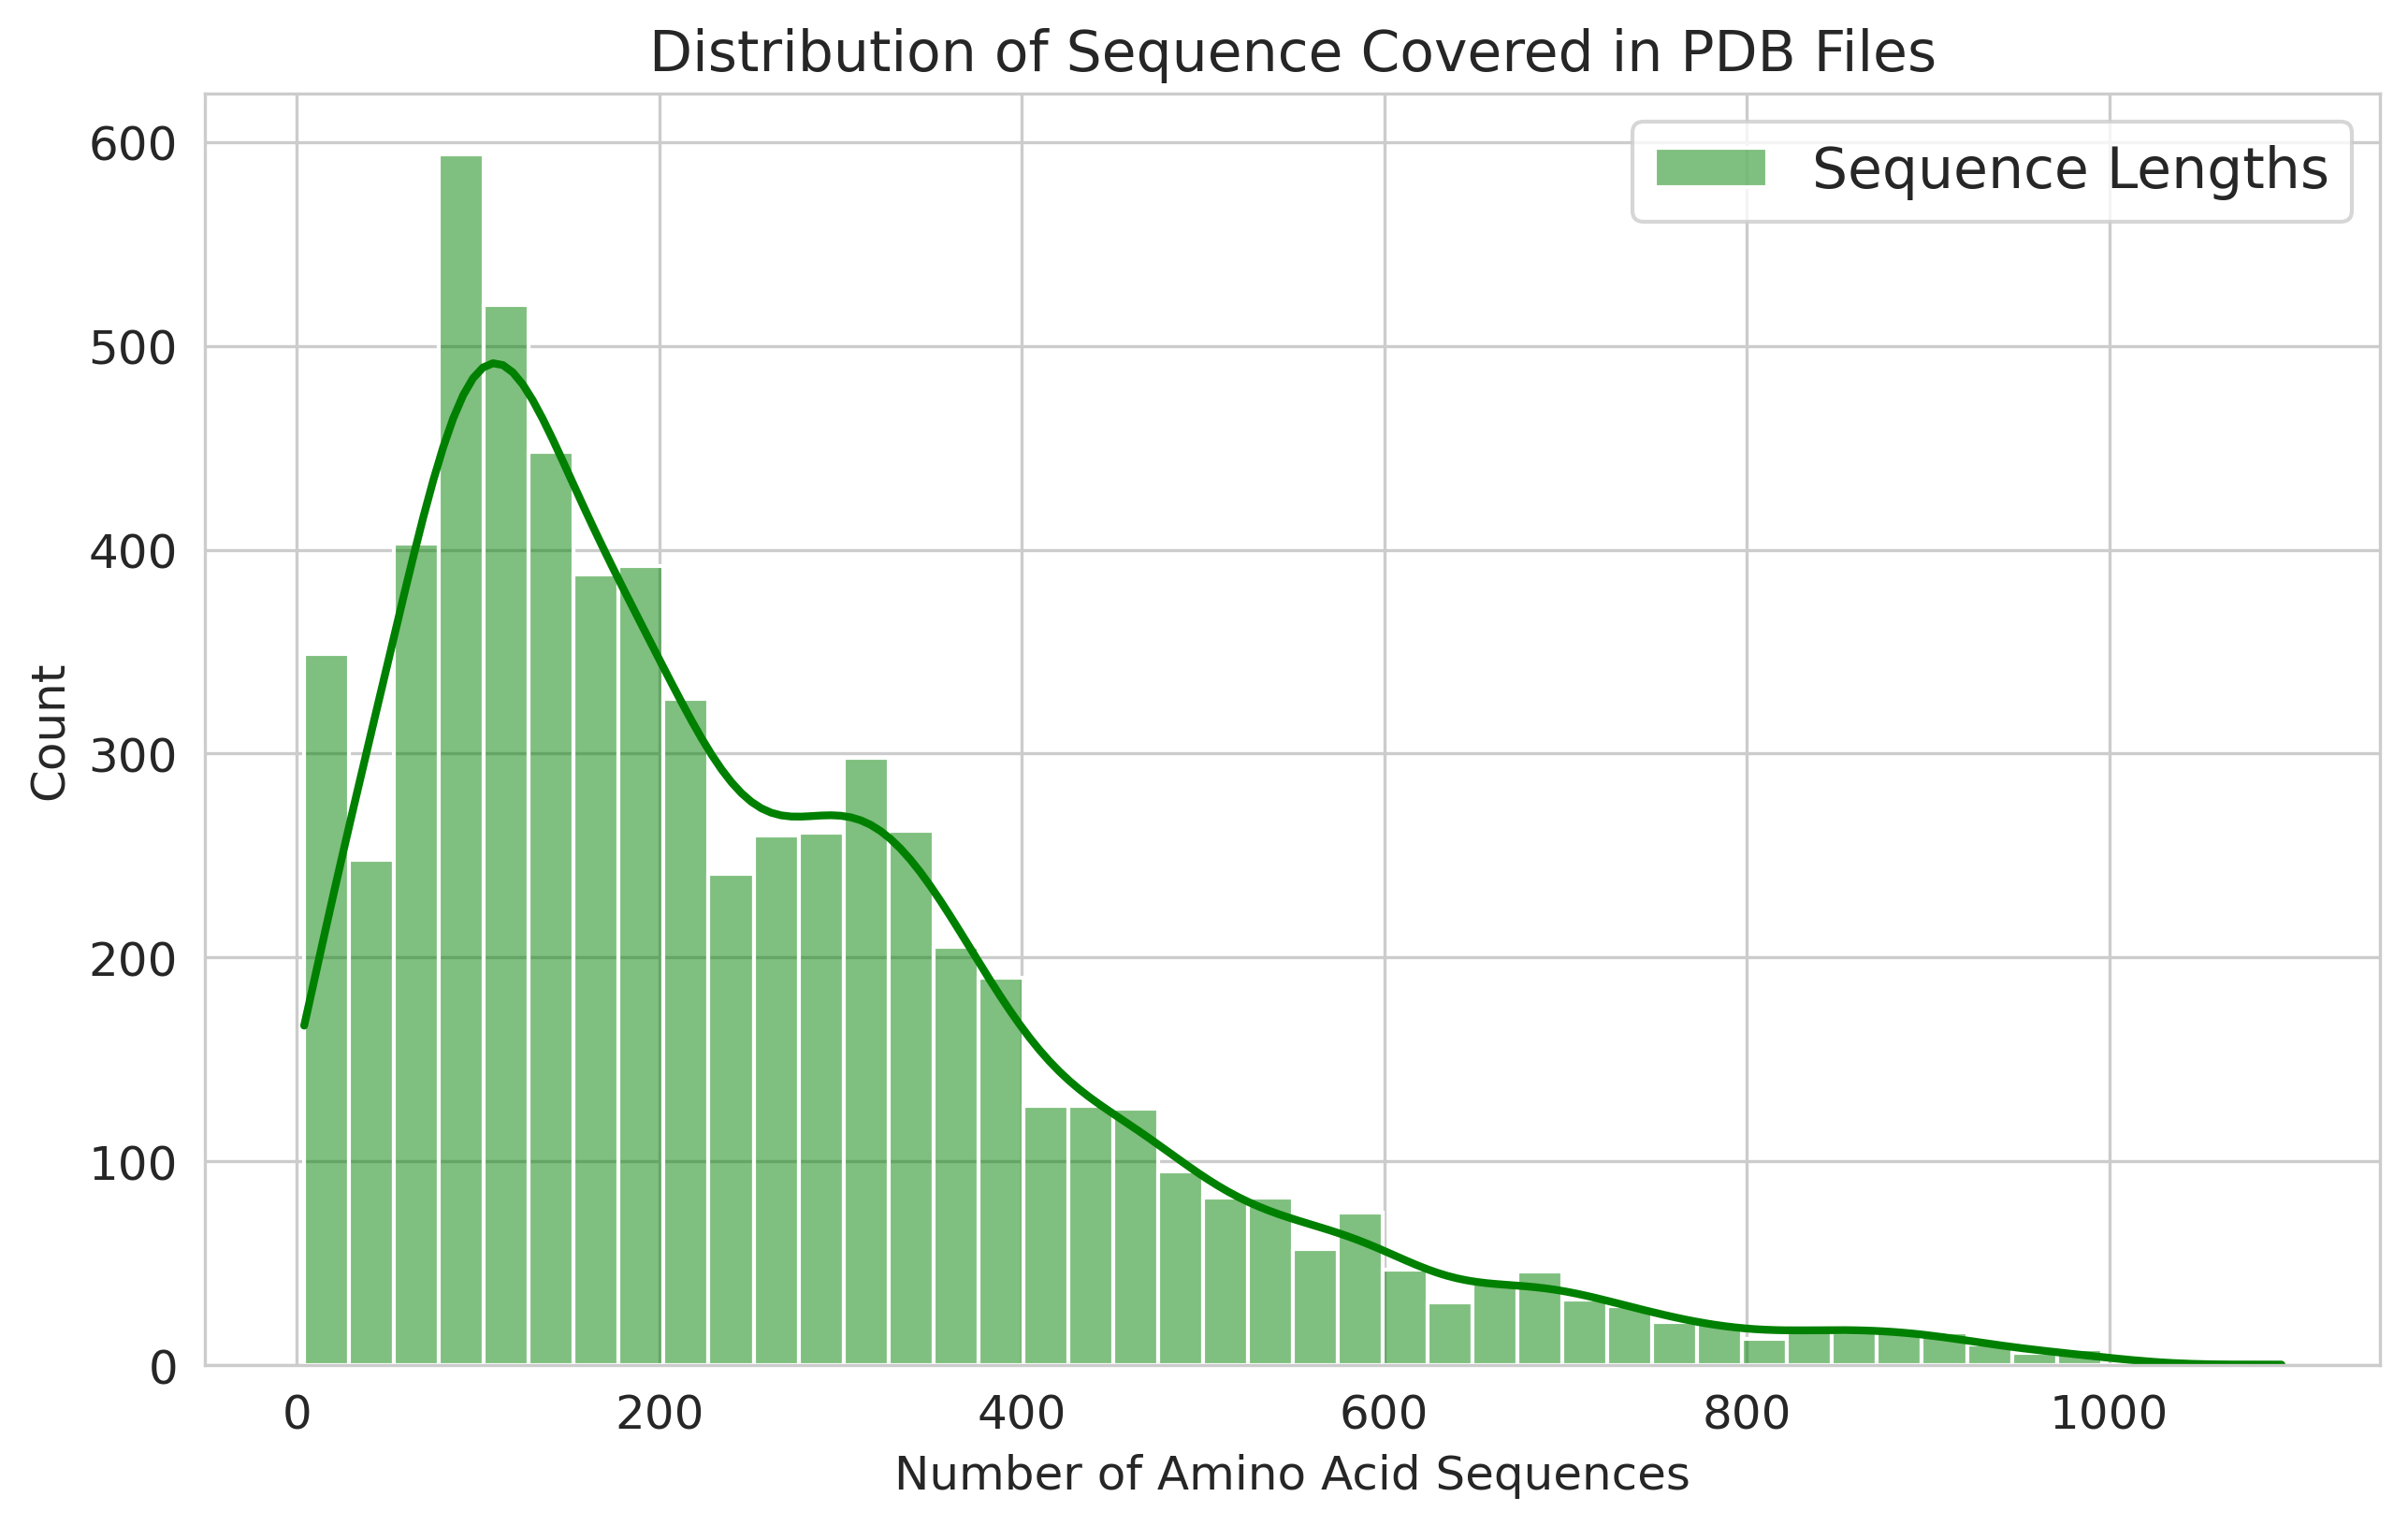

In [59]:
plt.figure(figsize=(10,6))
df_fil = df[(df["Length"] <= 1000)]
sns.histplot(df_fil['PDB Length'], color='green', kde=True, label='Sequence Lengths')
plt.legend()
plt.xlabel('Number of Amino Acid Sequences')
plt.title(f"Distribution of Coverage Retrieved from UniProt")
#plt.savefig("Figures/SequenceLengthDistribution.svg", format="svg")
plt.show()

# Distribution of coverage across dataset

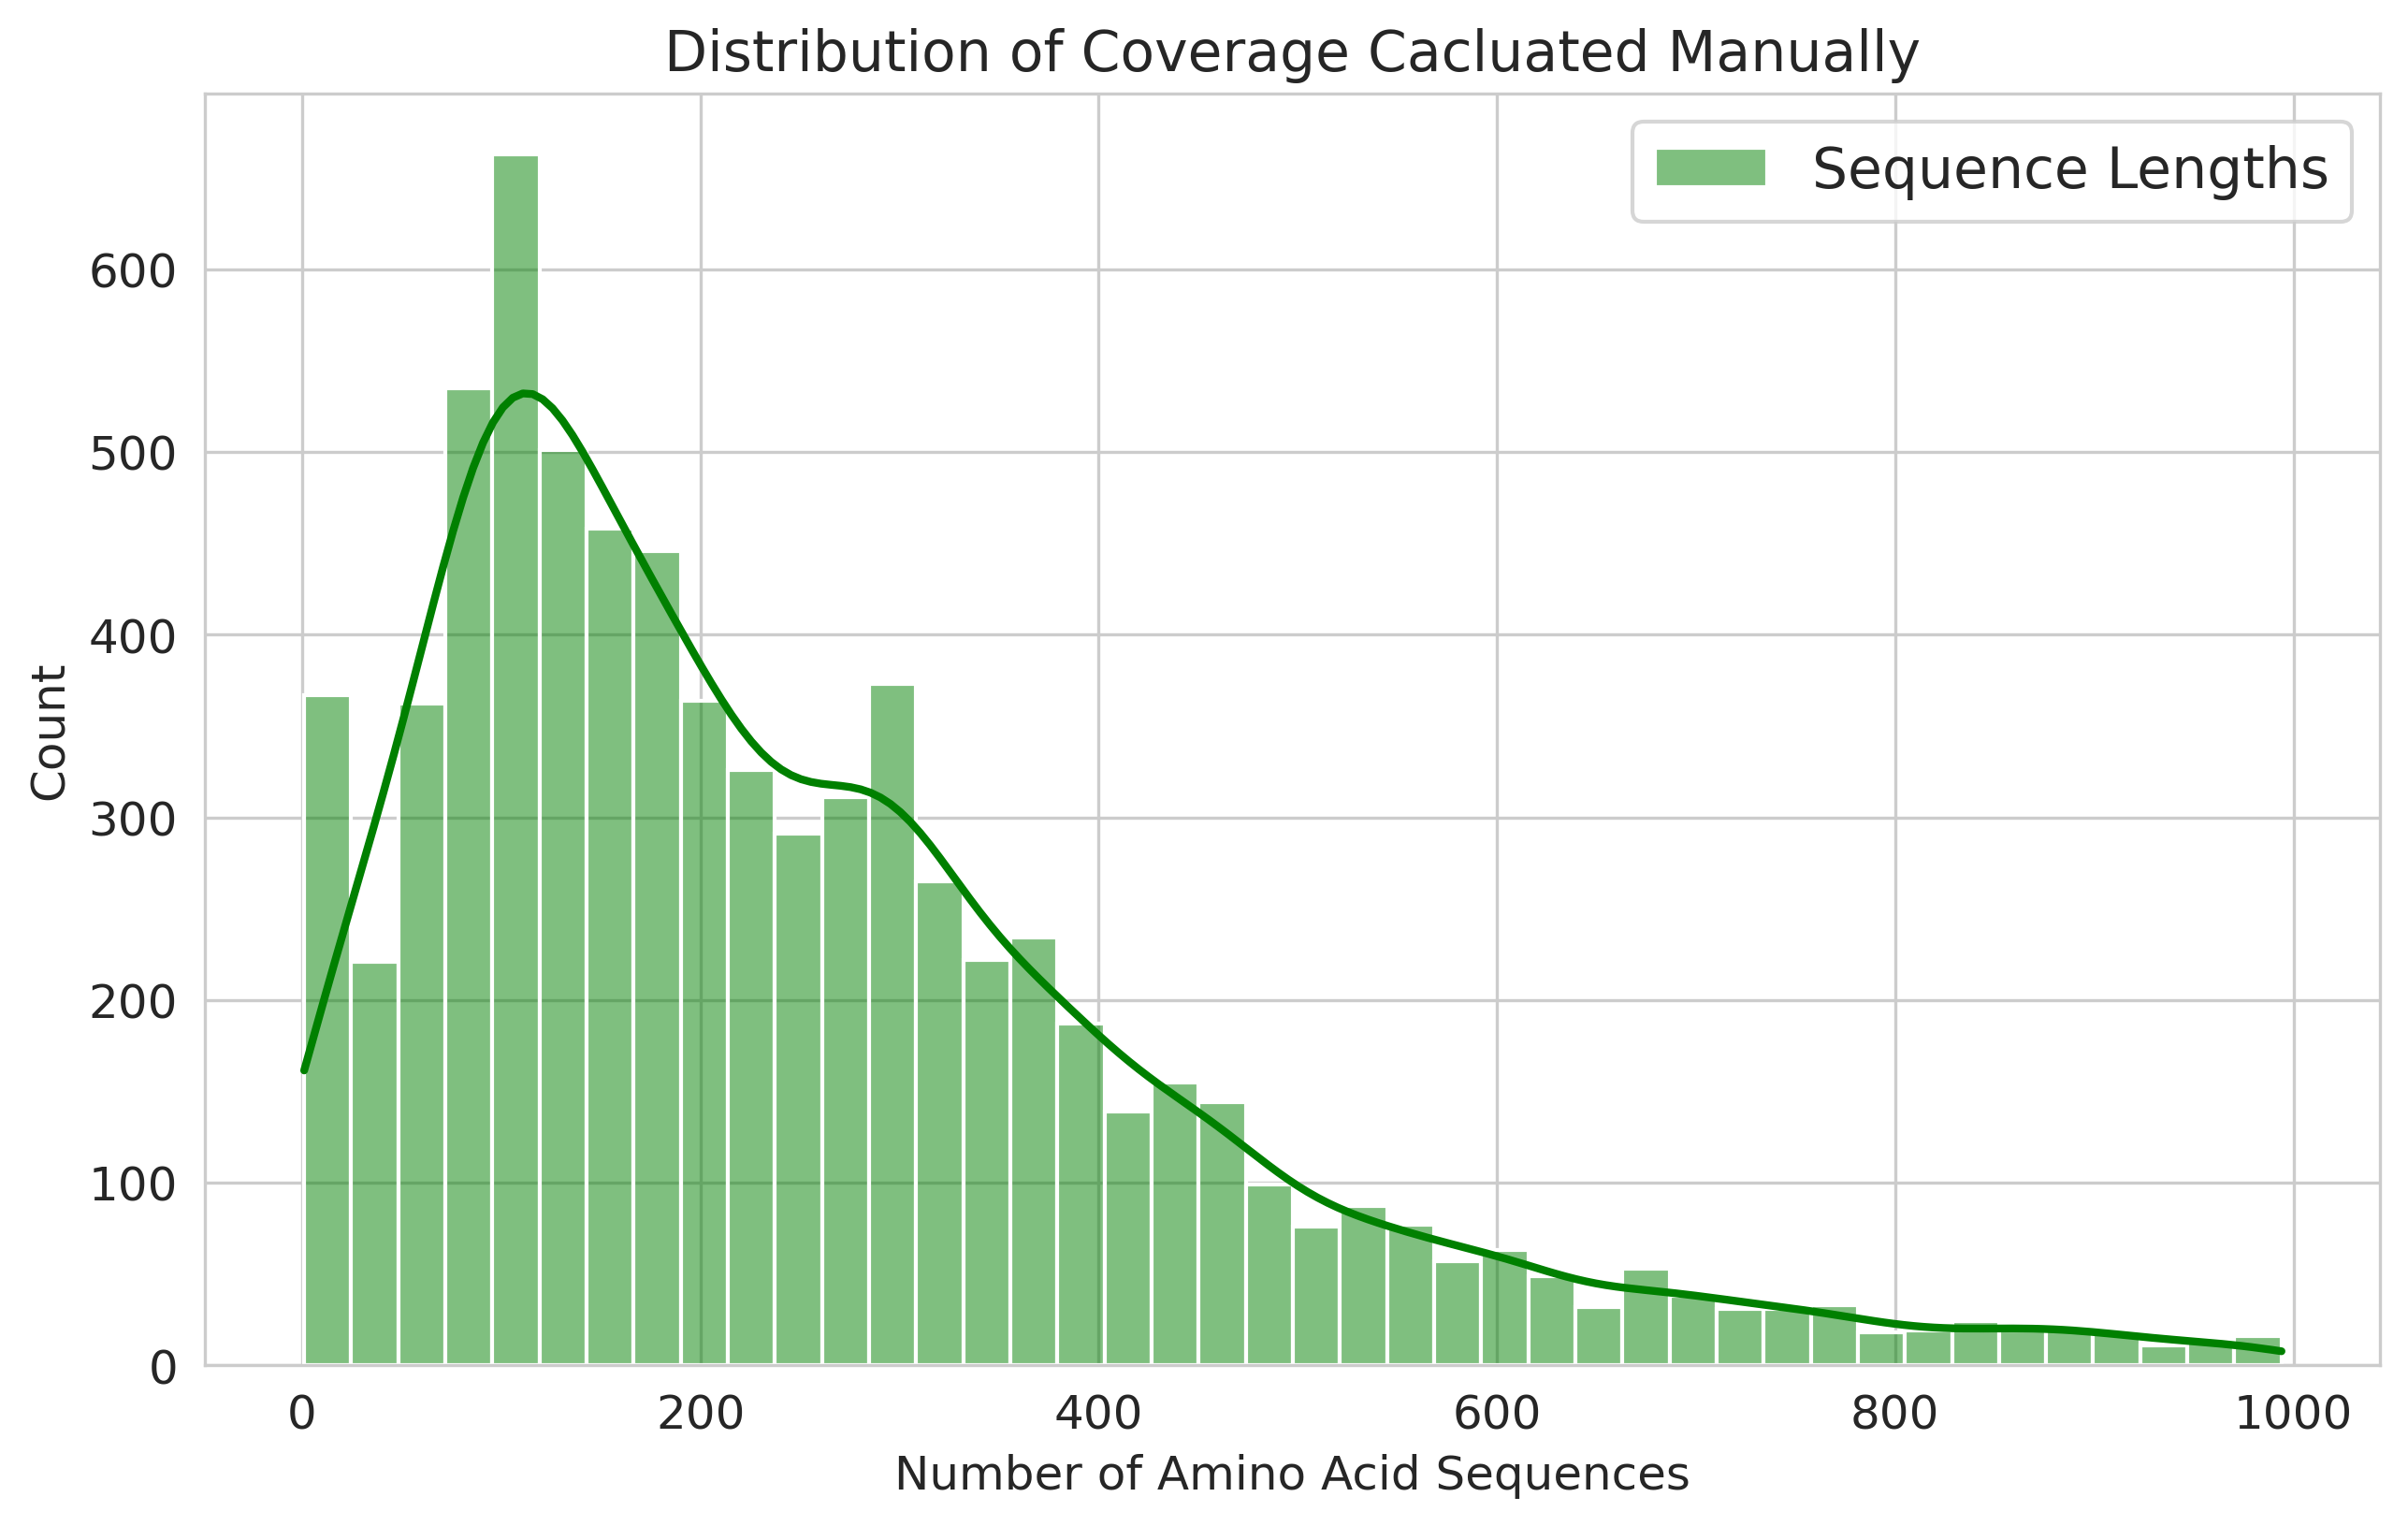

In [61]:
plt.figure(figsize=(10,6))
df_fil = df[(df["Coverage"] <= 1000)]
sns.histplot(df_fil['Coverage'], color='light green', kde=True, label='Sequence Lengths')
plt.legend()
plt.xlabel('Number of Amino Acid Sequences')
plt.title(f"Distribution of Coverage Cacluated Manually")
#plt.savefig("Figures/SequenceLengthDistribution.svg", format="svg")
plt.show()

# Comparing Coverage Calculator with Uniprot Data 

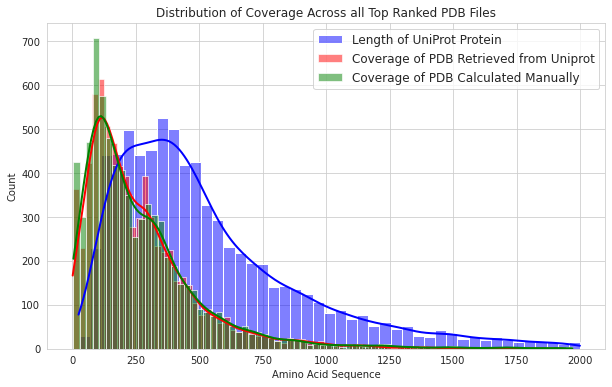

In [16]:
plt.figure(figsize=(10,6))
df_fil = df[(df["Length"] <= 2000)]
df_fil = df_fil[(df_fil["Coverage"] <= 2000)]
sns.histplot(df_fil["Length"], color='blue', kde=True, label='Length of UniProt Protein')
sns.histplot(df_fil["Coverage"], color='red', kde=True, label='Coverage of PDB Retrieved from Uniprot')
sns.histplot(df_fil["PDB Length"], color='green', kde=True, label='Coverage of PDB Calculated Manually')
plt.legend()
plt.xlabel('Amino Acid Sequence')
plt.title("Distribution of Coverage Across all Top Ranked PDB Files")
plt.savefig("Figures/CoverageDistribution.svg", format = "svg")
plt.show()